In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
zeropoint = np.load('Run_040118/bolp_21p0_0.npz')
pert = np.load('Run_040118/bolp_21p0_um_0.npz')

In [3]:
N_pert = 10000
N_real = 1000

In [4]:
p_0 = zeropoint['param'][0]
print p_0

[  1.33738  13.98811   0.5595   11.95797  12.82356   0.        0.     ]


In [5]:
p_pert = pert['param']

In [6]:
def calc_cov(covjk,func_real):
    return np.mean(covjk,axis=0)+np.cov(func_real.T)

In [7]:
def calc_fisher(dfdp, covtot):
    fmatrix = np.zeros((7,7))
    for i in range(7):
        for j in range(7):
            fmatrix[i,j] = np.dot(dfdp[i],np.dot(np.linalg.inv(covtot),dfdp[j]))
    return fmatrix

In [8]:
def calc_1sigma(fisher):
    return np.sqrt(np.linalg.inv(fisher).diagonal())

In [9]:
idx_pert = []
for i in range(N_pert/10):
    idx_pert.append(np.random.choice(np.arange(N_pert/2),i*5+5,replace=0))

In [10]:
for i in range(N_pert/10):
    idx_pert[i] = np.concatenate((idx_pert[i],idx_pert[i]+N_pert/2,\
                                  idx_pert[i]+N_pert,idx_pert[i]+N_pert+N_pert/2,\
                                  idx_pert[i]+2*N_pert,idx_pert[i]+2*N_pert+N_pert/2,\
                                  idx_pert[i]+3*N_pert,idx_pert[i]+3*N_pert+N_pert/2,\
                                  idx_pert[i]+4*N_pert,idx_pert[i]+4*N_pert+N_pert/2,\
                                  idx_pert[i]+5*N_pert,idx_pert[i]+5*N_pert+N_pert/2,\
                                  idx_pert[i]+6*N_pert,idx_pert[i]+6*N_pert+N_pert/2))

In [11]:
def df_dp(funcp,paramp):
    dfdp = np.zeros((7,funcp.shape[1]))
    for i in range(7):
        for j in range(funcp.shape[1]):
            dfdp[i,j] = (np.mean(funcp[funcp.shape[0]/7*i:funcp.shape[0]/7*i+funcp.shape[0]/14,j])-\
                         np.mean(funcp[funcp.shape[0]/7*i+funcp.shape[0]/14:funcp.shape[0]/7*(i+1),j]))/\
                         (paramp[funcp.shape[0]/7*i,i]-paramp[funcp.shape[0]/7*i+funcp.shape[0]/14,i])
                           
    return dfdp

## Npert test

In [20]:
Npert_test = np.zeros((N_pert/100,7))
cov = calc_cov(zeropoint['func_all_cov'][:,:120,:120],zeropoint['func_all'][:,:120])
for j in range(N_pert/100):
        Npert_test[j] = calc_1sigma(calc_fisher(df_dp(pert['func_all'][idx_pert[j],:120],p_pert[idx_pert[j]]),\
                                                cov))
        print j

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


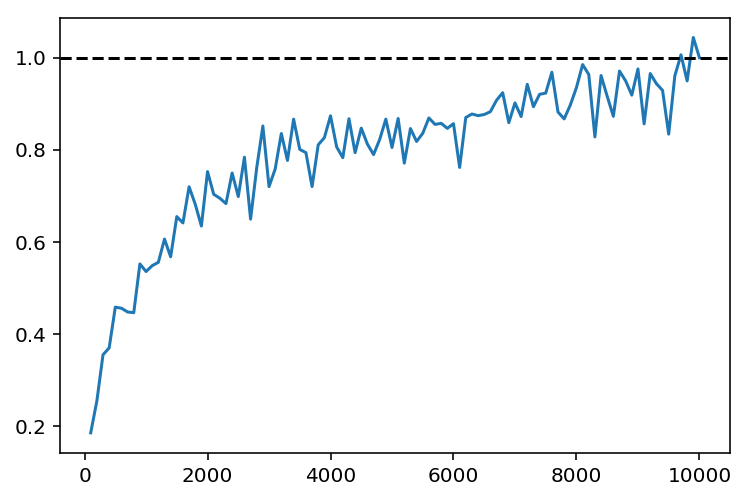

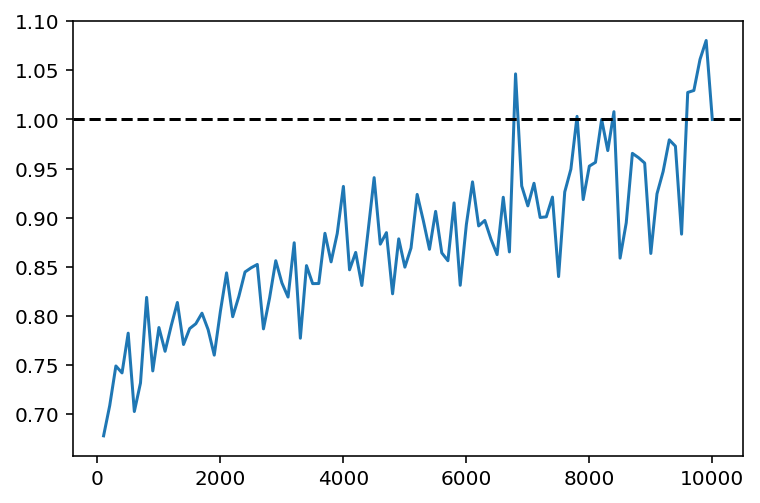

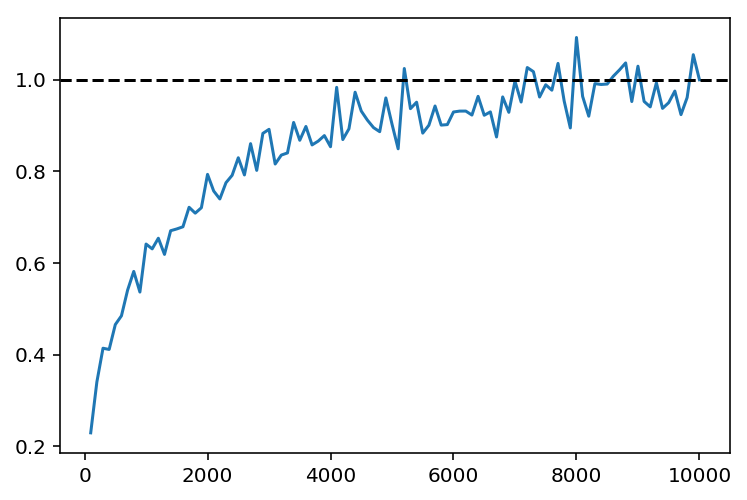

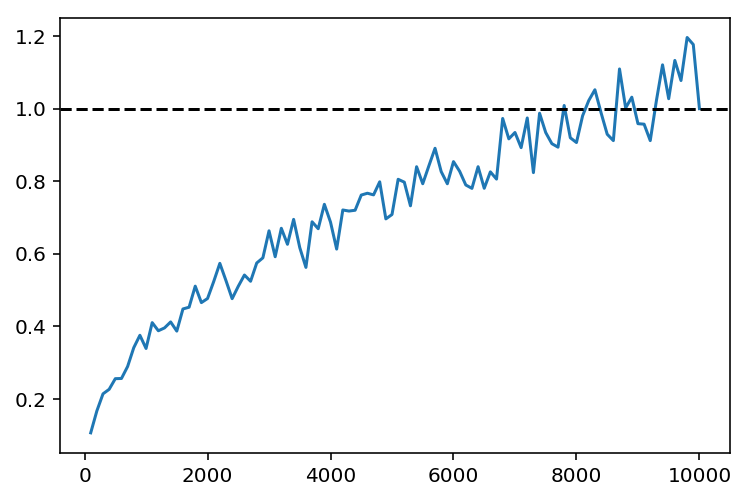

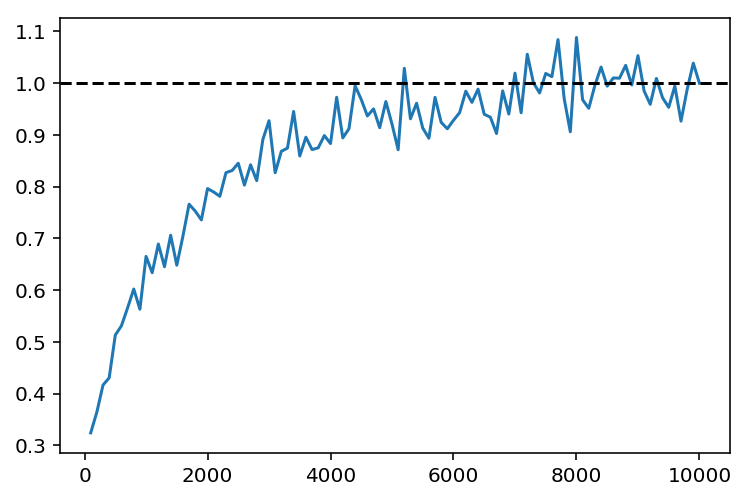

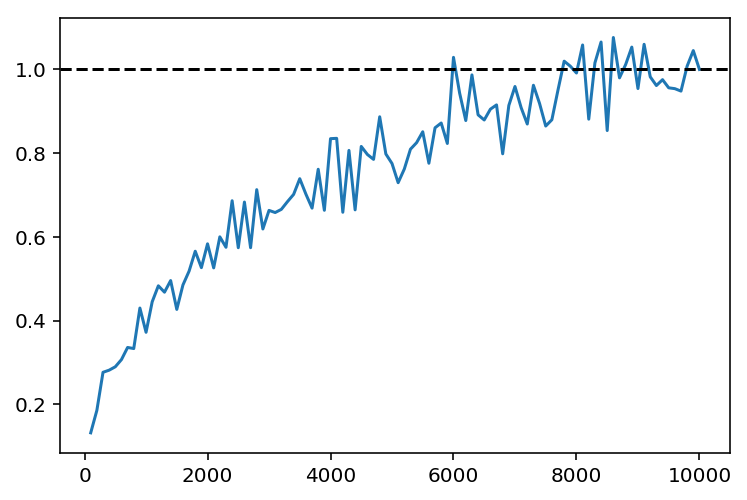

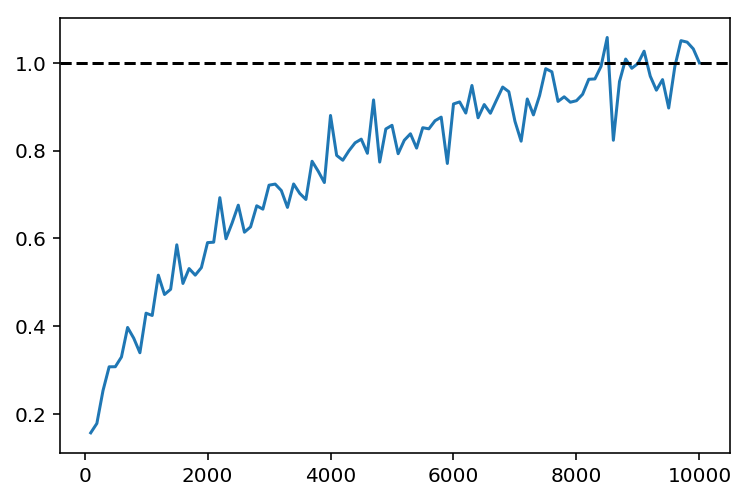

In [22]:
for i in range(7):
    plt.figure()
    plt.plot(np.linspace(100,10000,100),Npert_test[:,i]/Npert_test[-1,i])
    plt.axhline(1,color='k',linestyle='--')

/home/kuw8/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


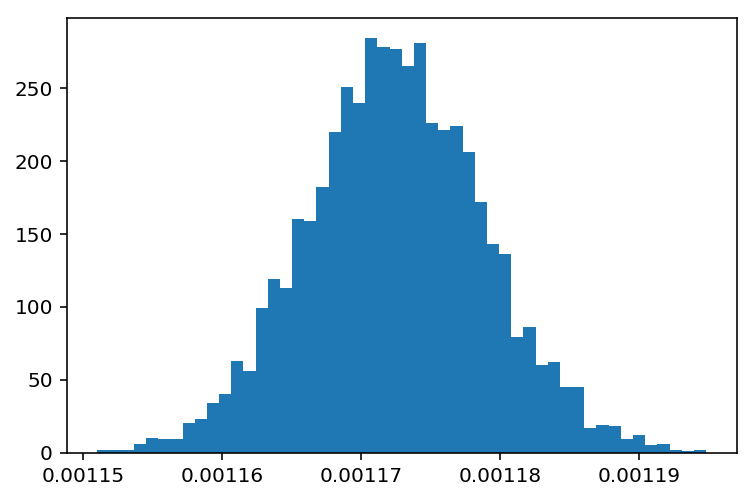

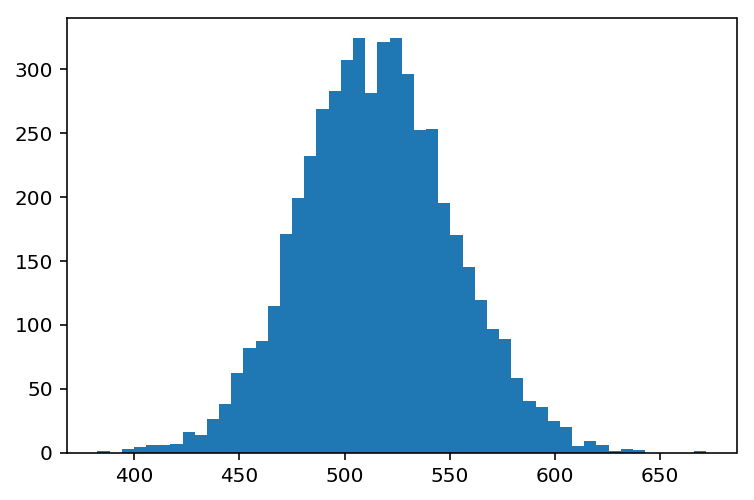

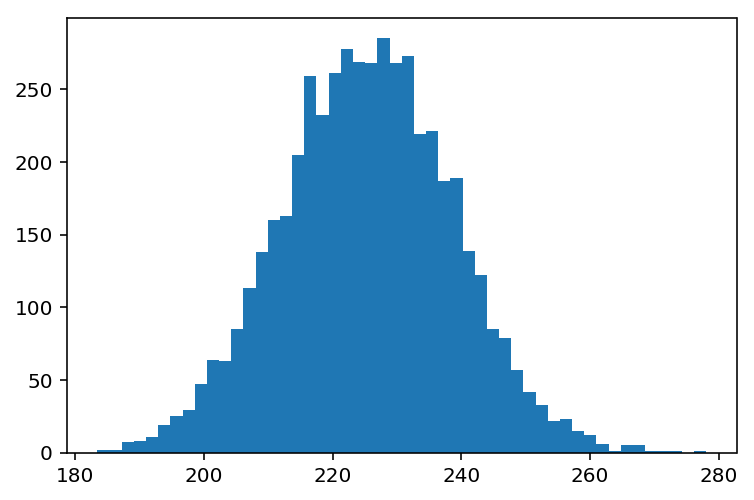

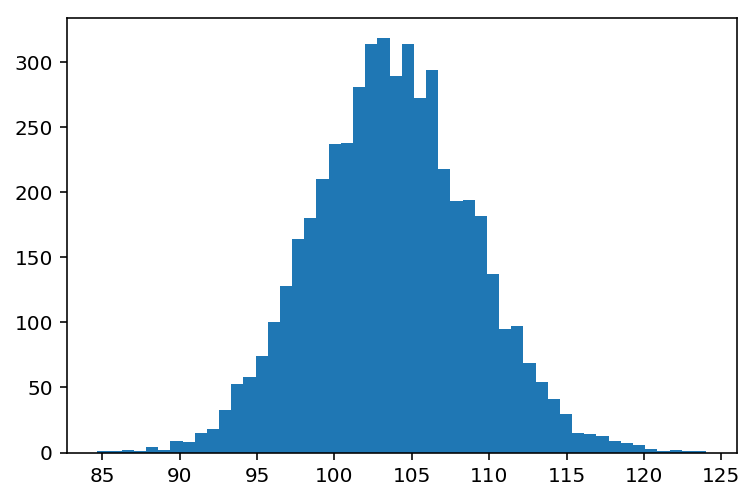

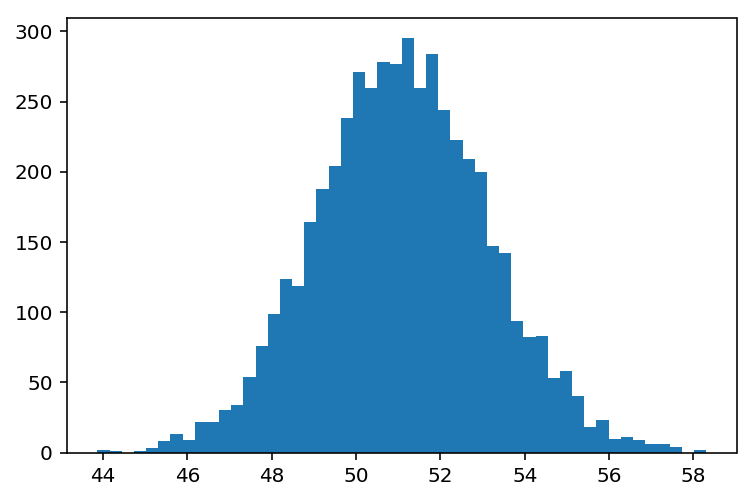

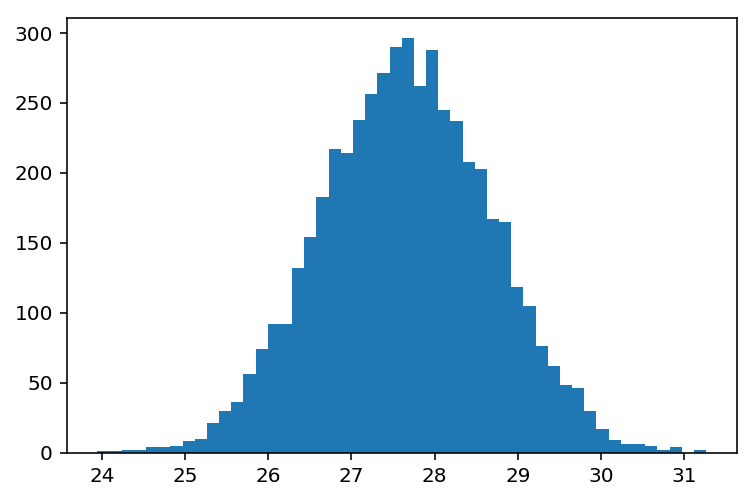

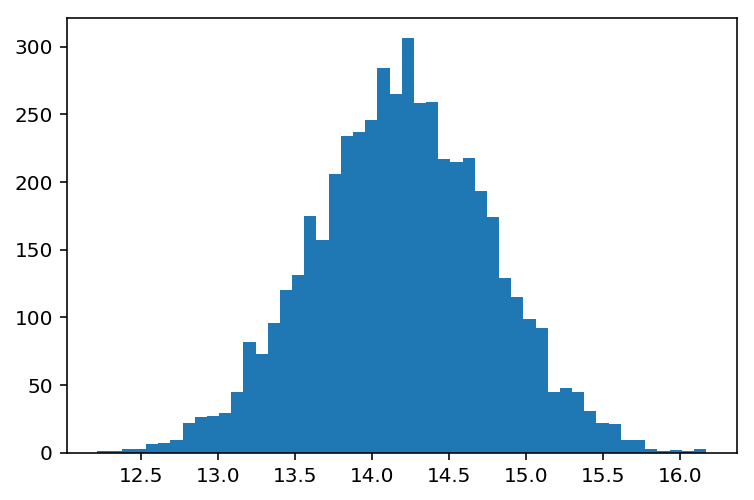

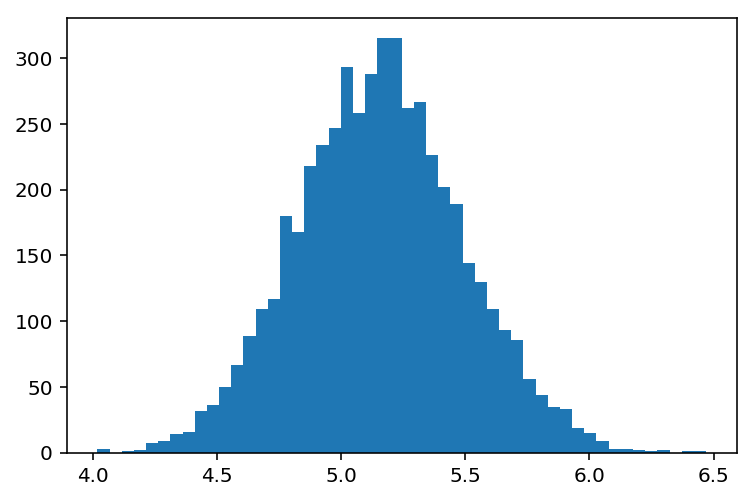

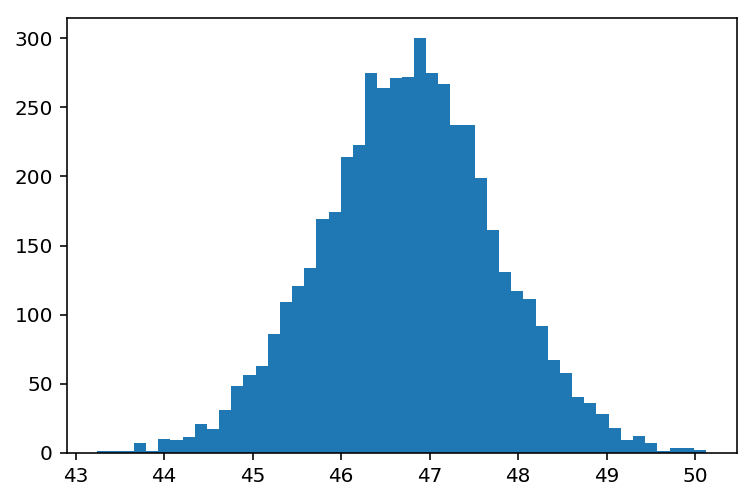

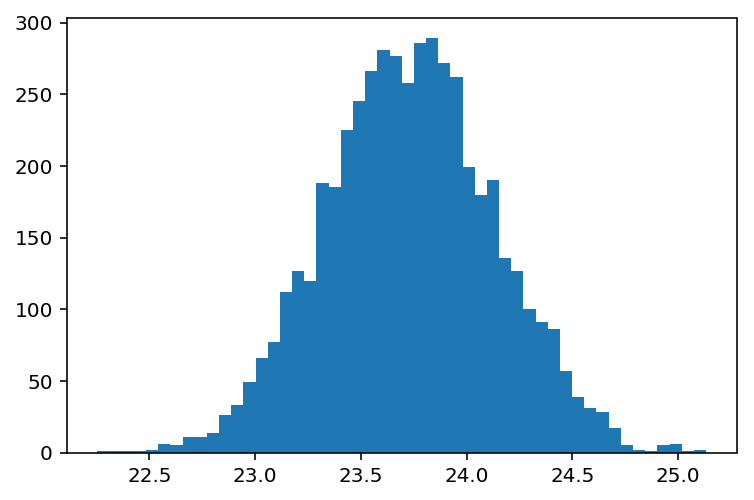

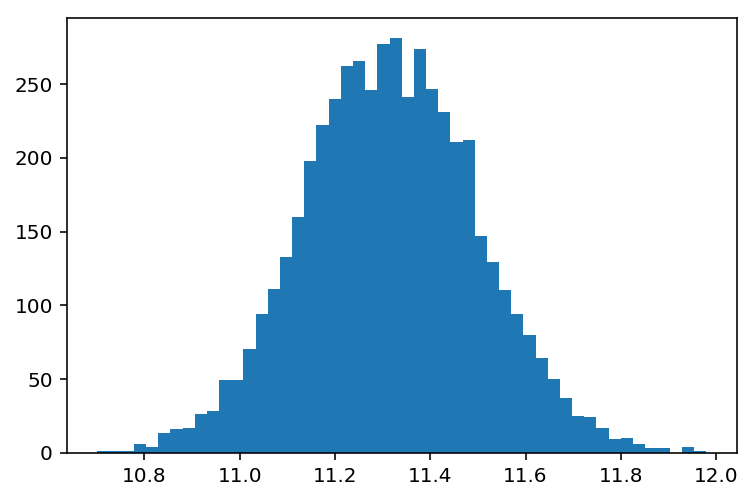

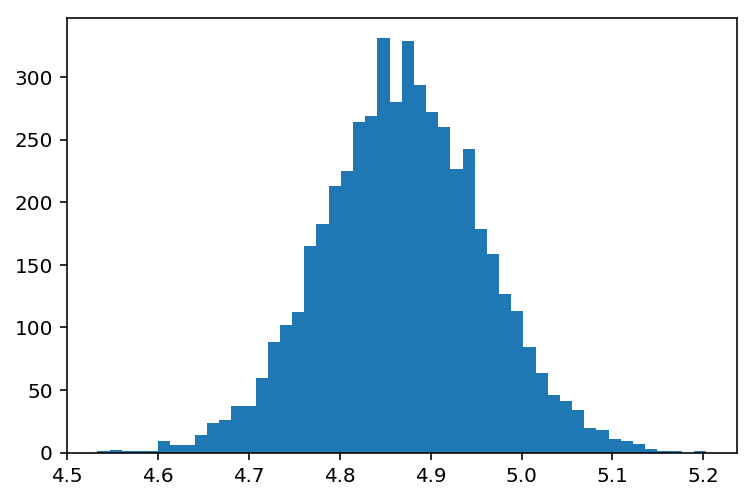

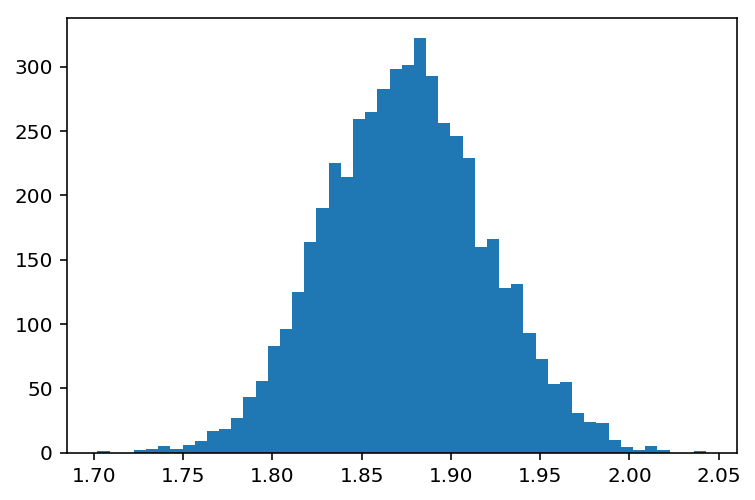

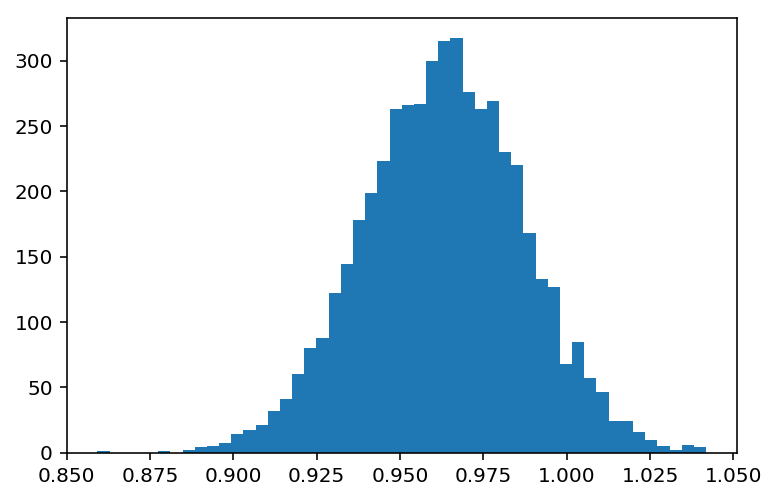

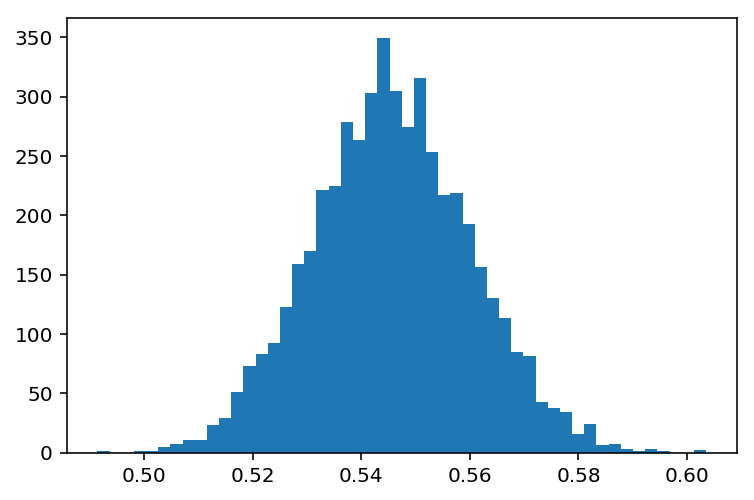

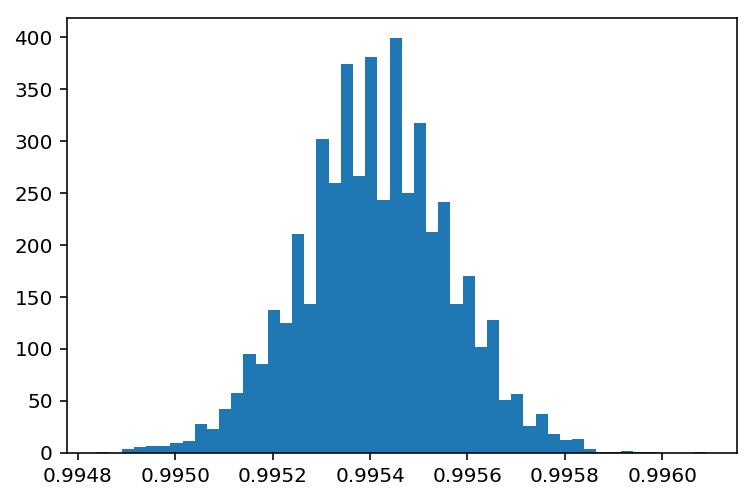

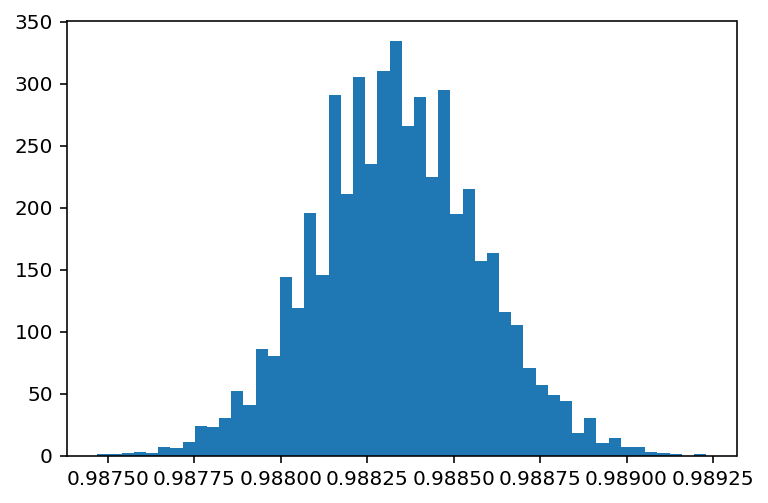

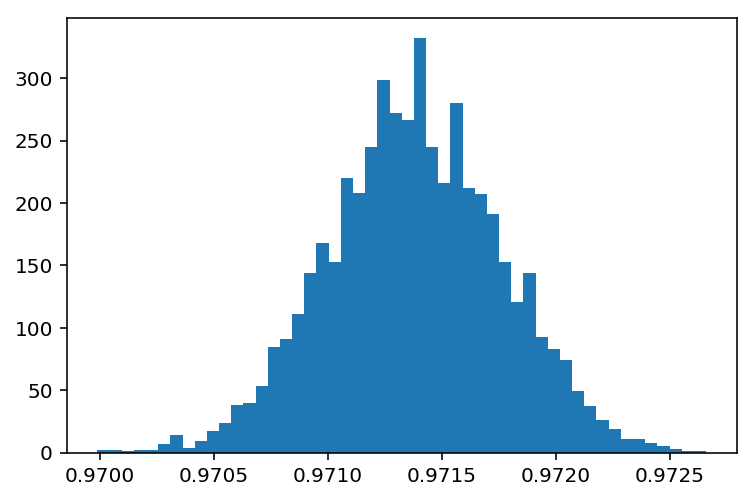

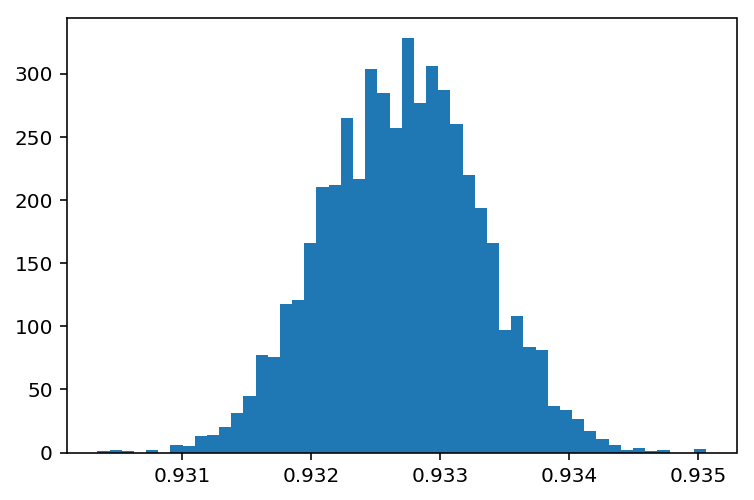

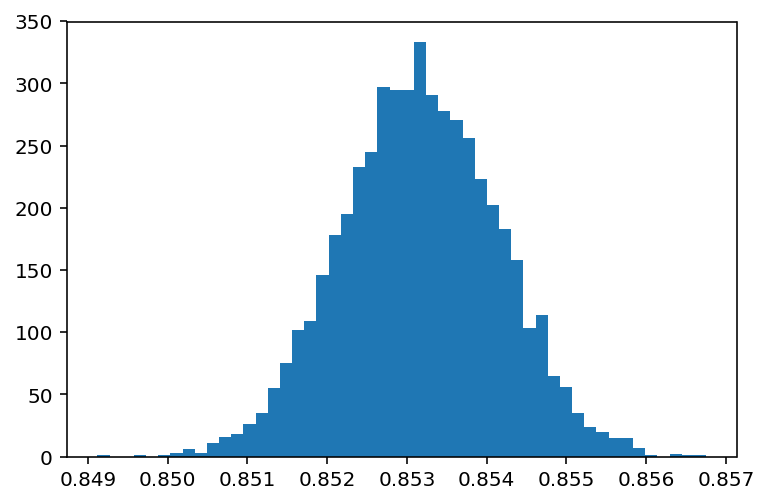

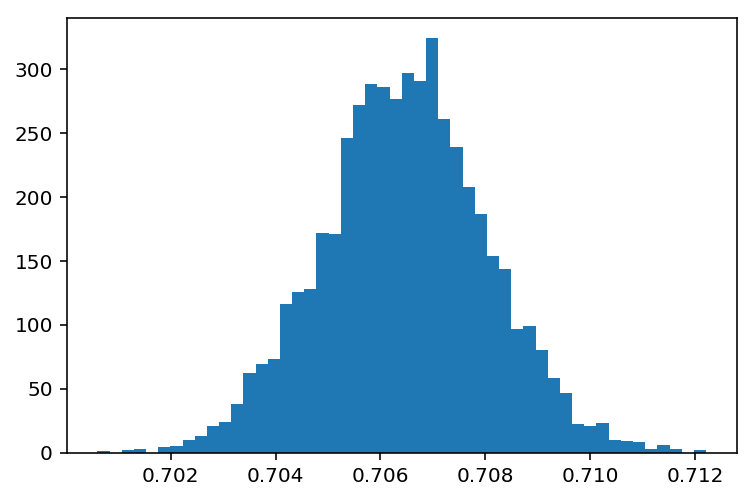

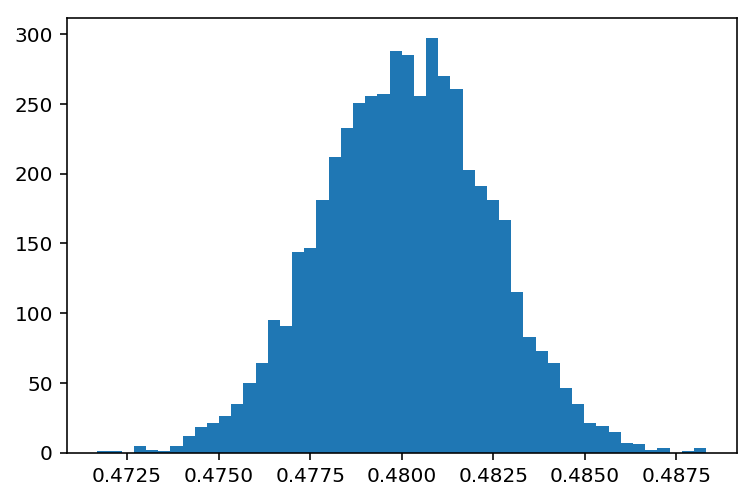

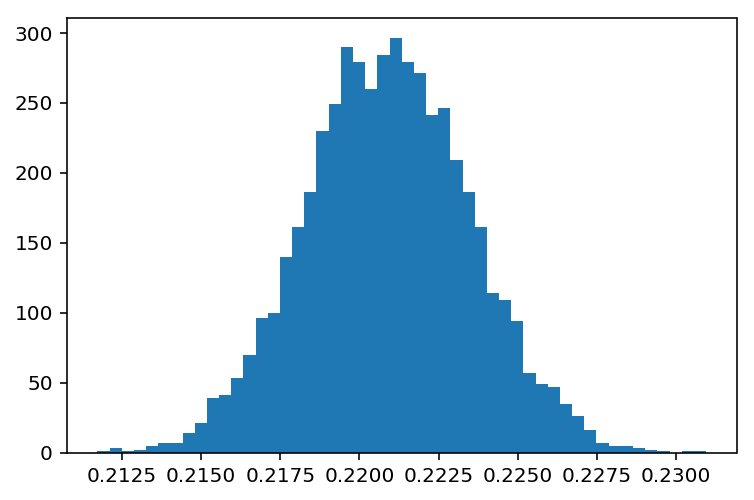

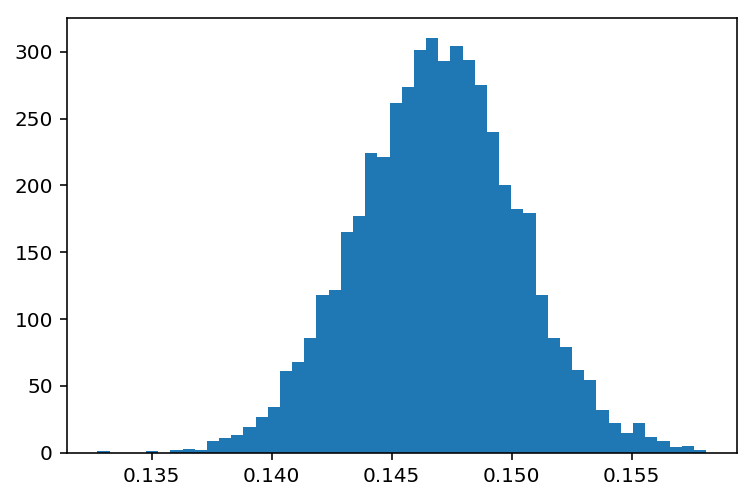

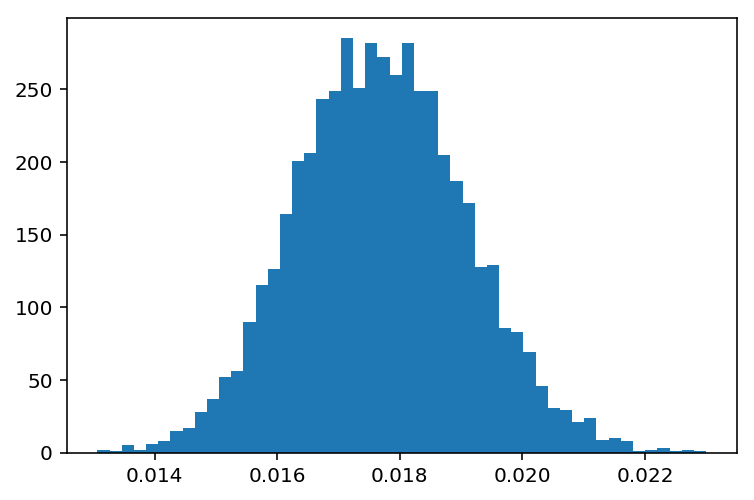

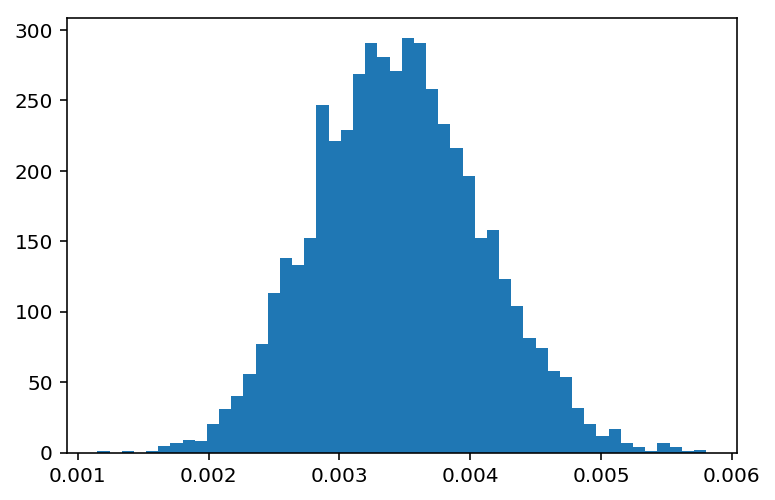

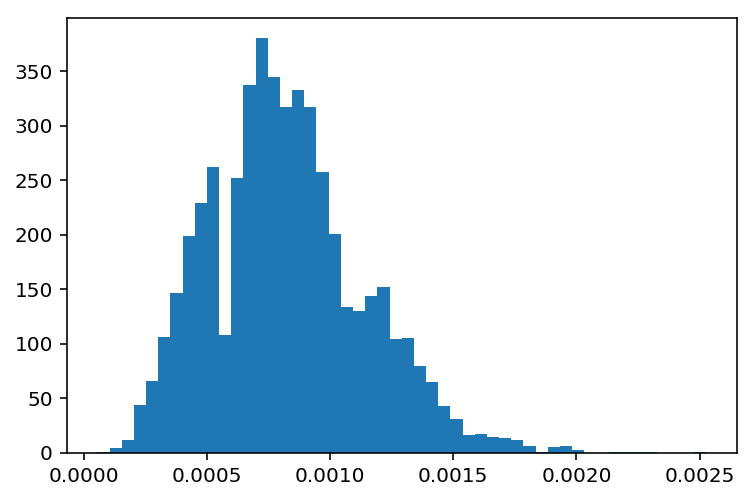

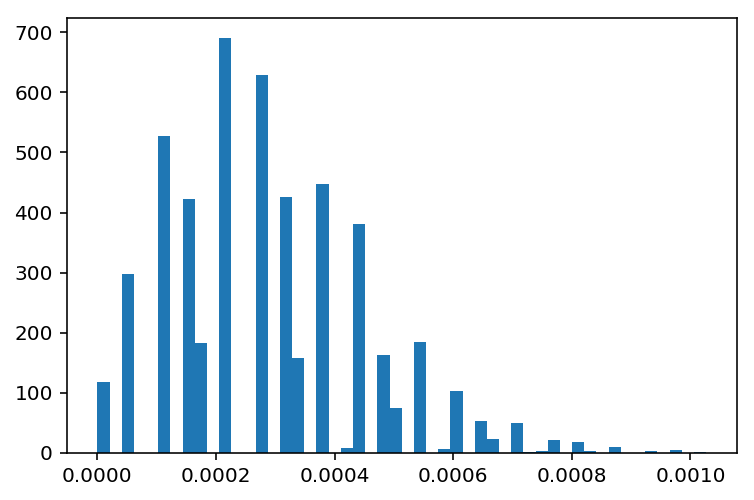

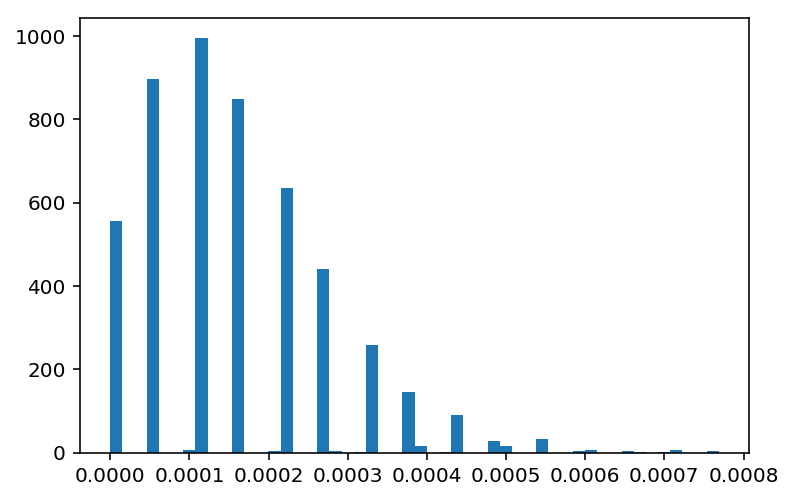

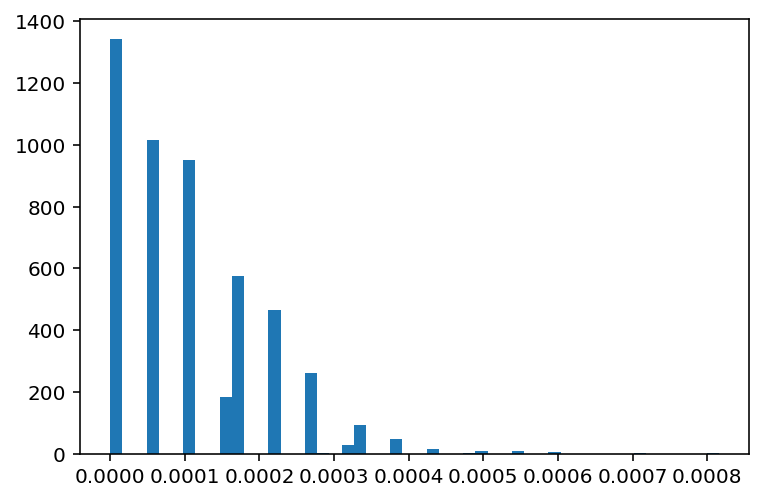

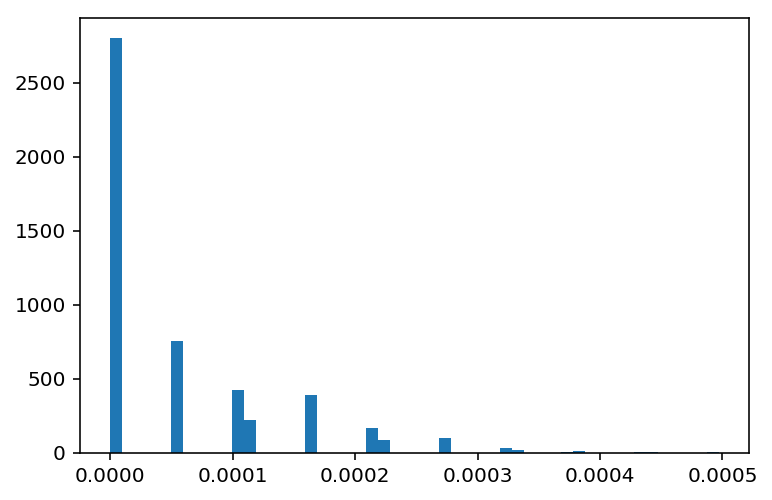

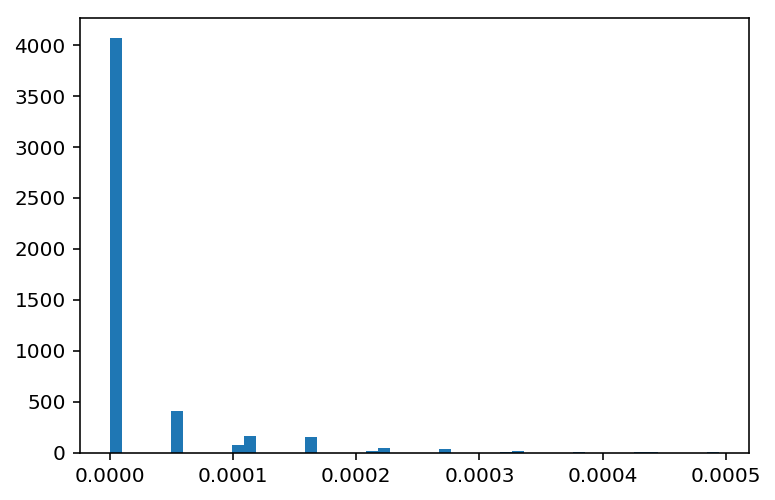

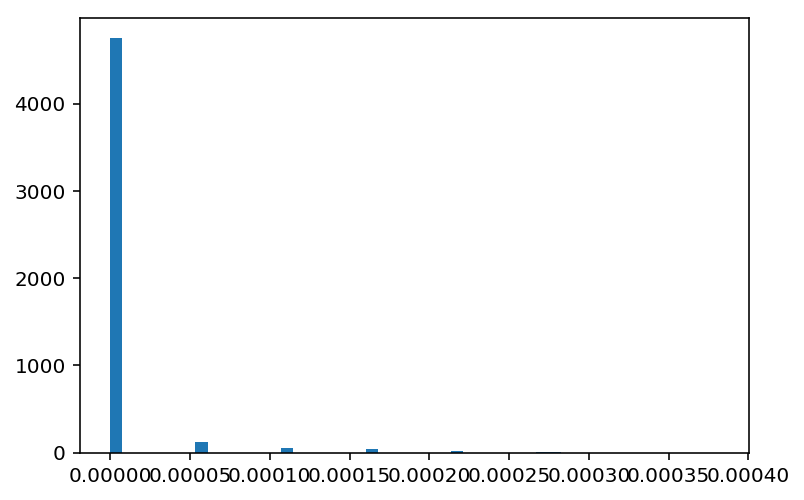

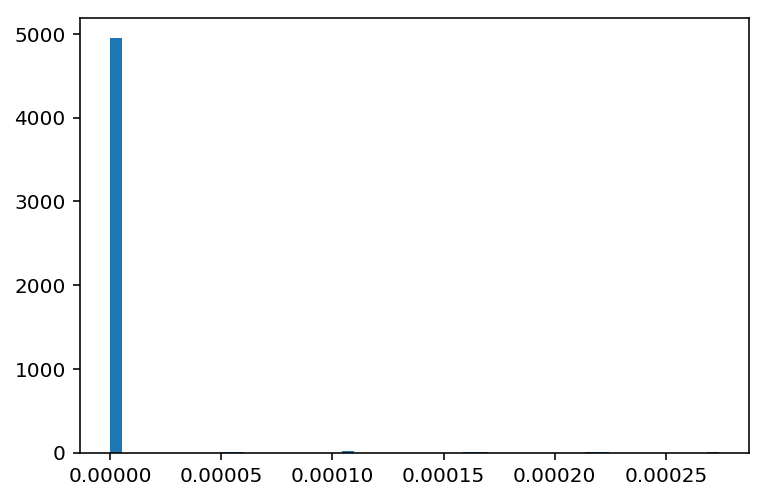

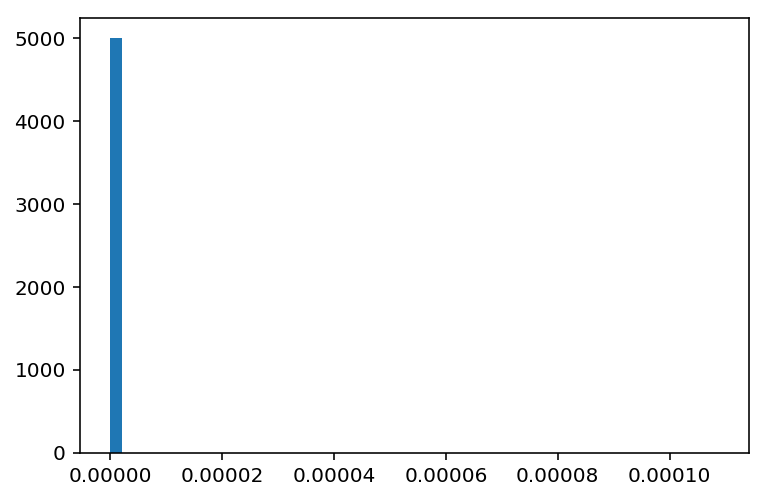

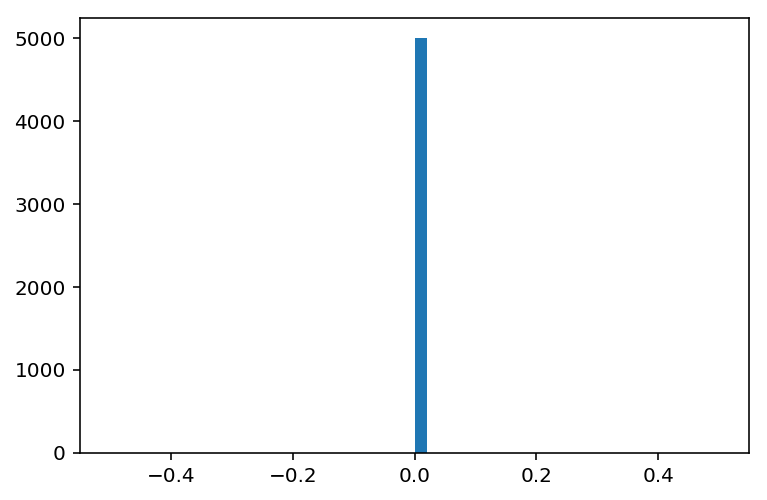

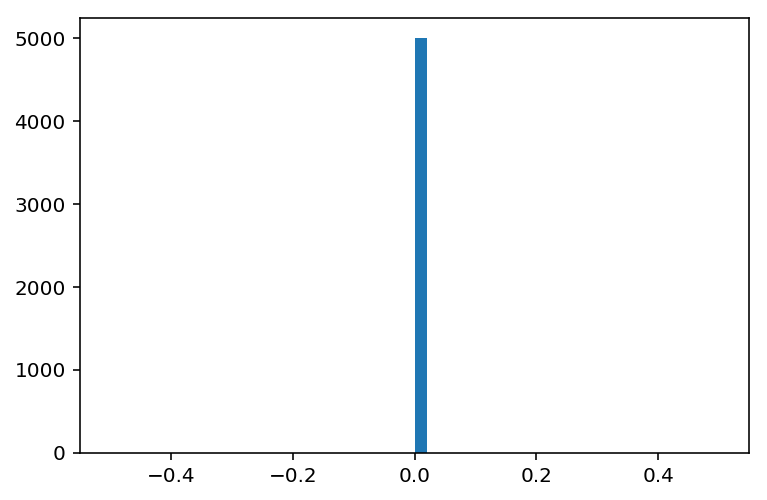

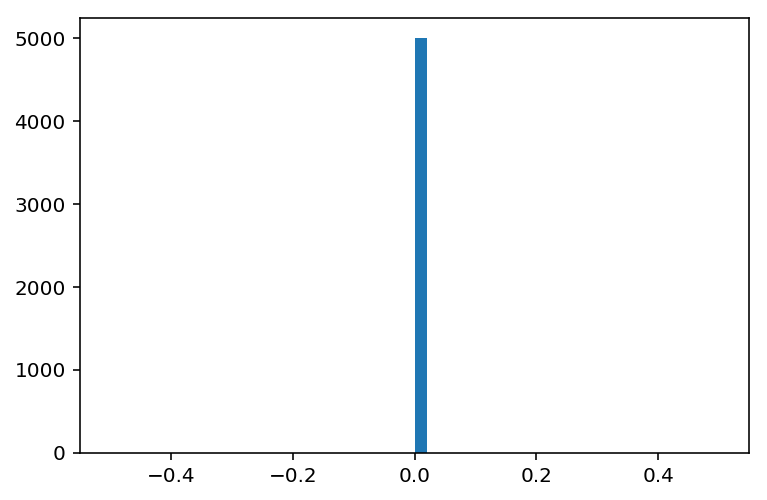

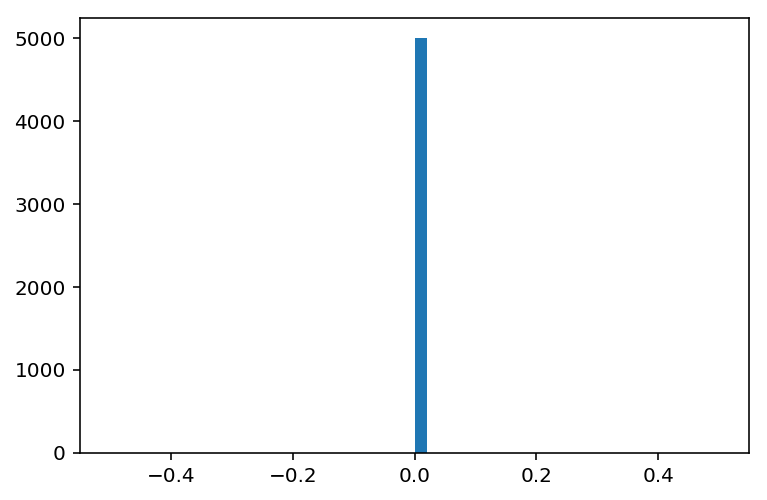

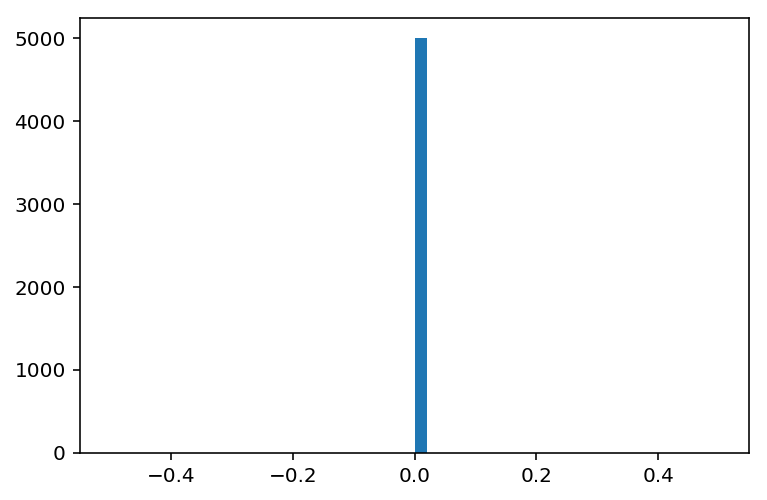

In [46]:
for i in range(40):
    plt.figure()
    plt.hist(pert['func_all'][:5000,i*4],50)

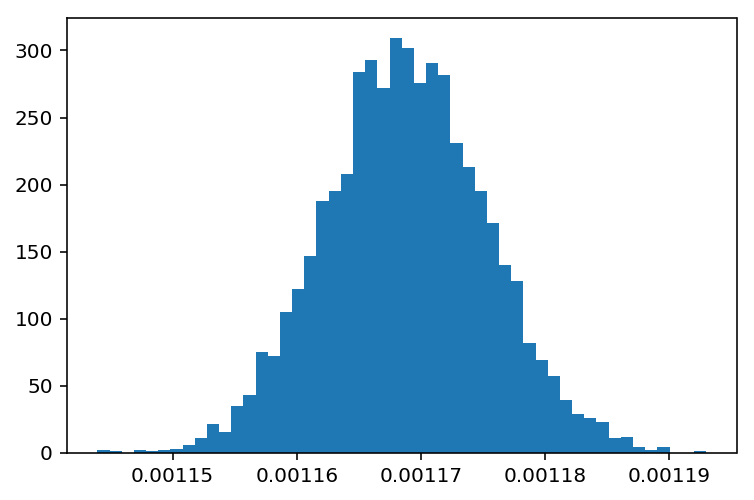

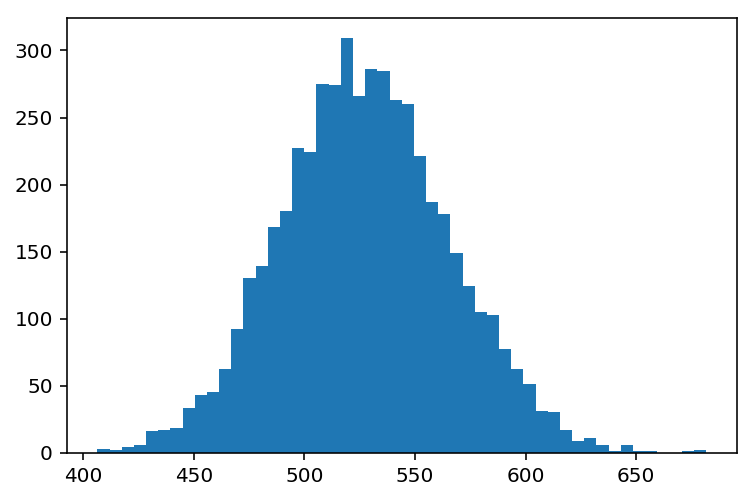

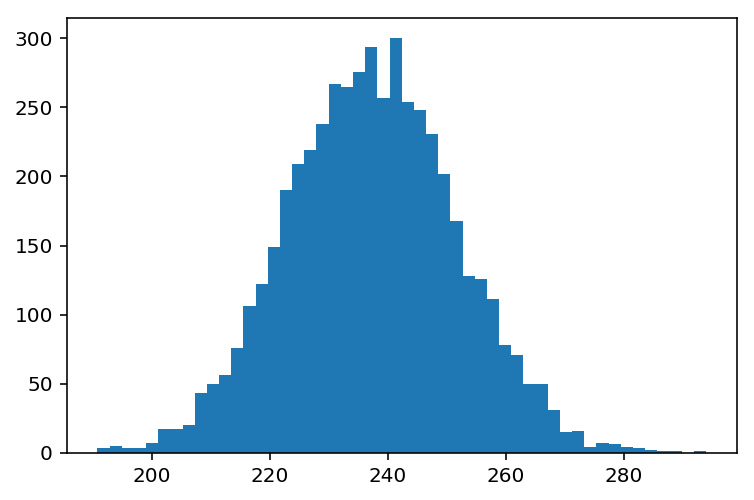

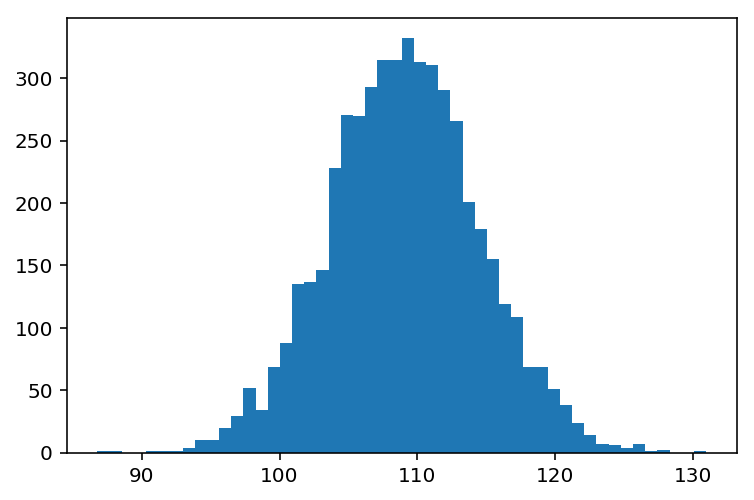

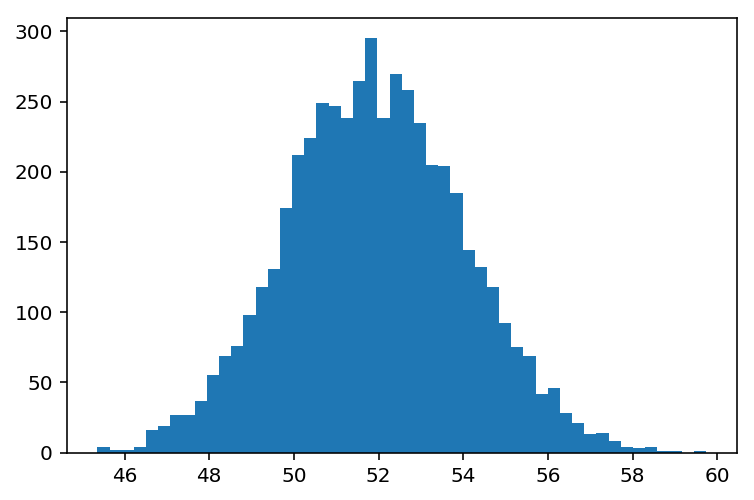

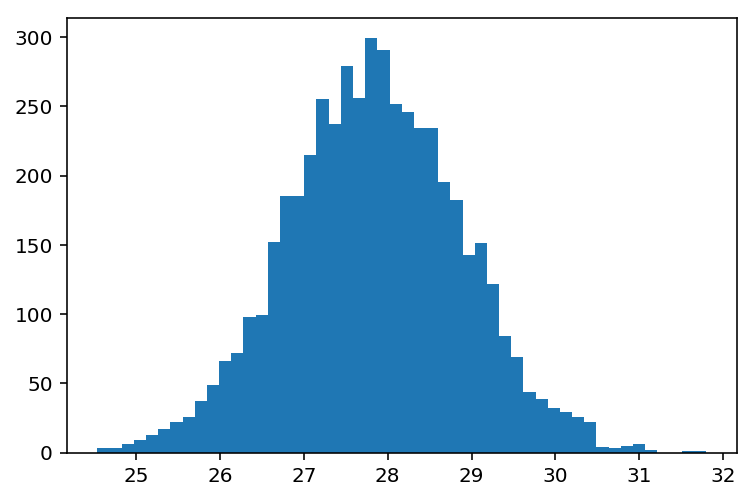

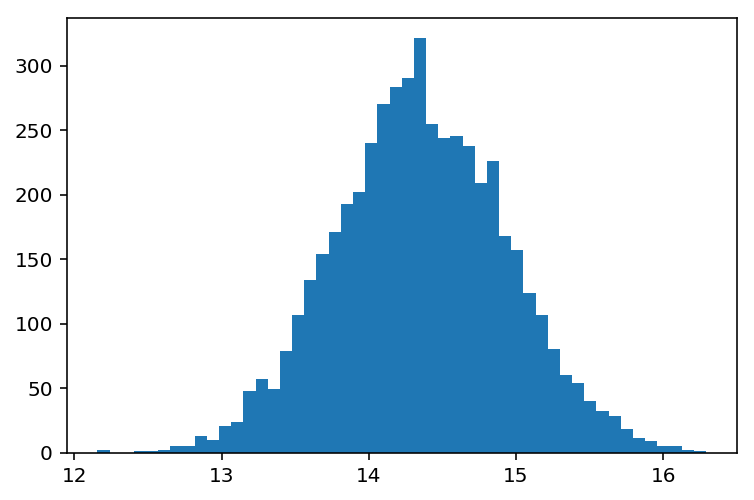

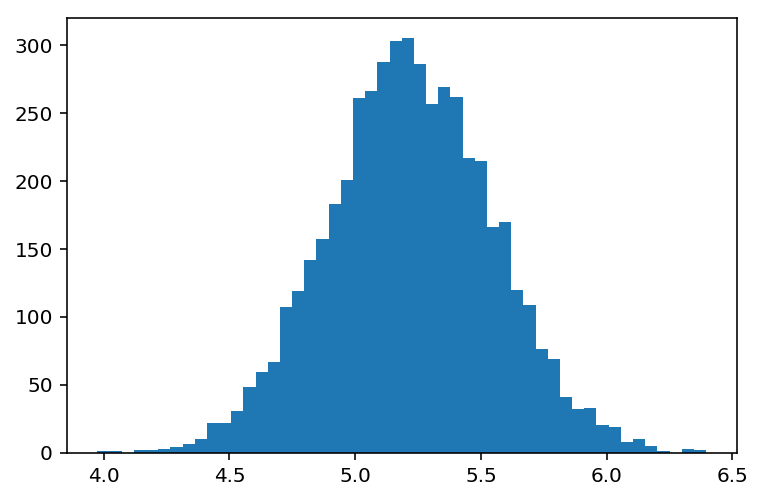

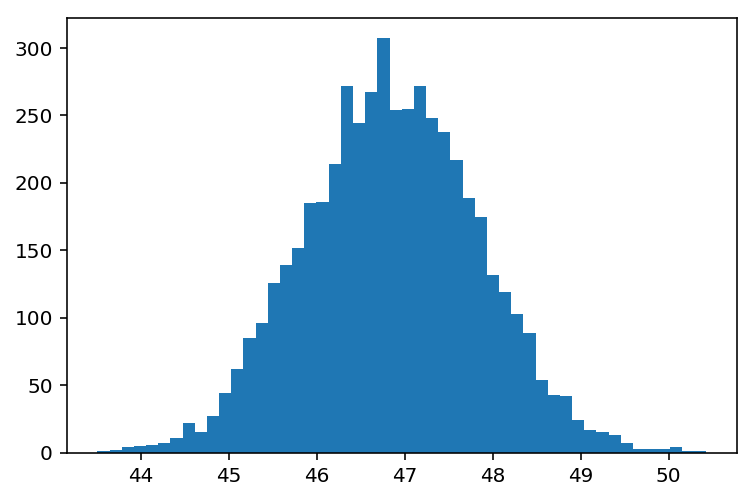

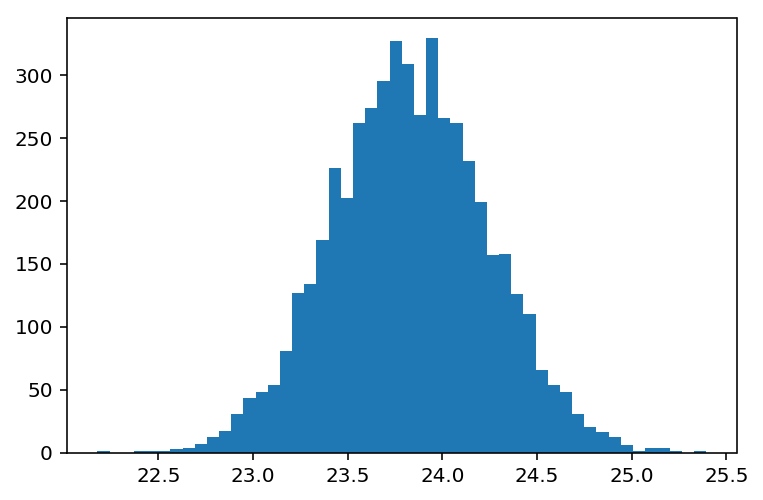

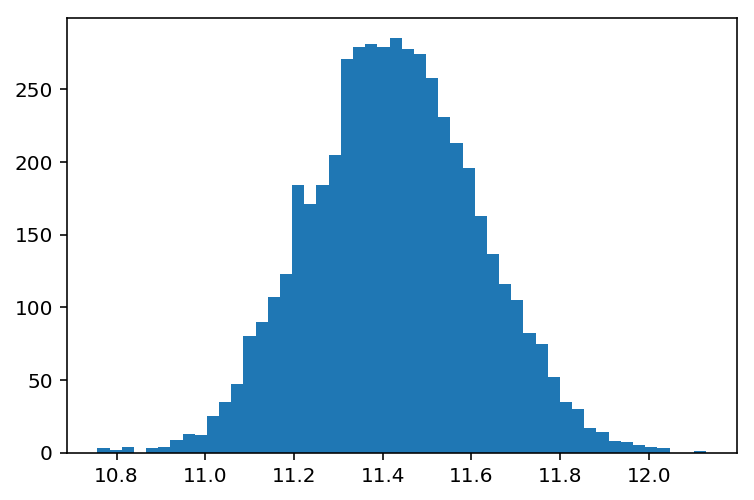

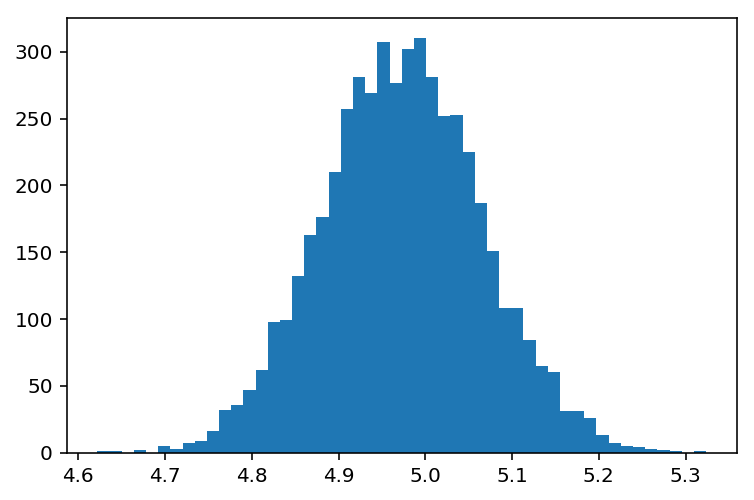

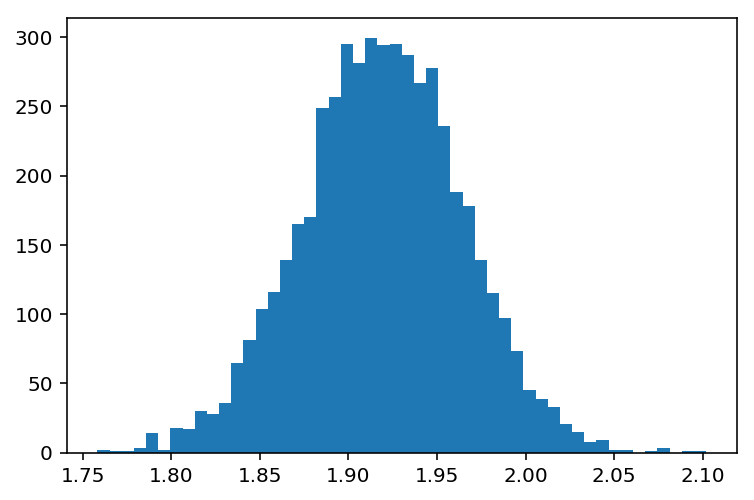

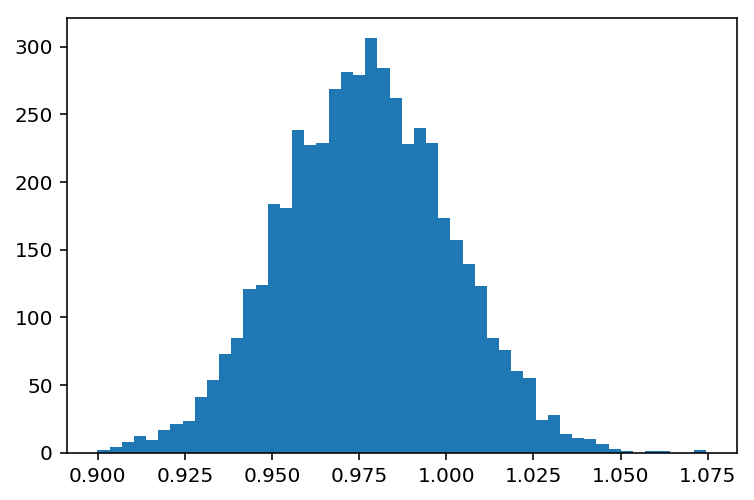

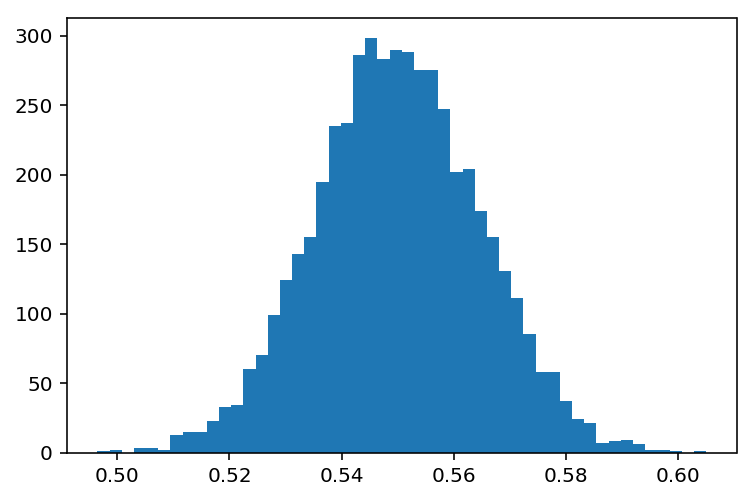

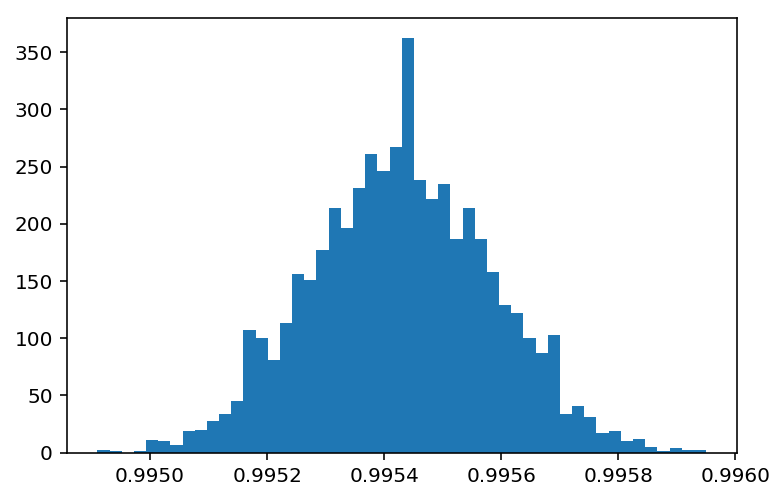

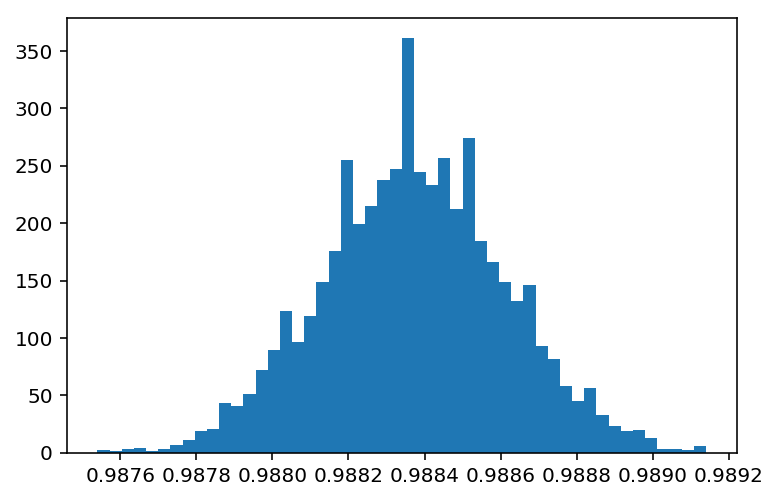

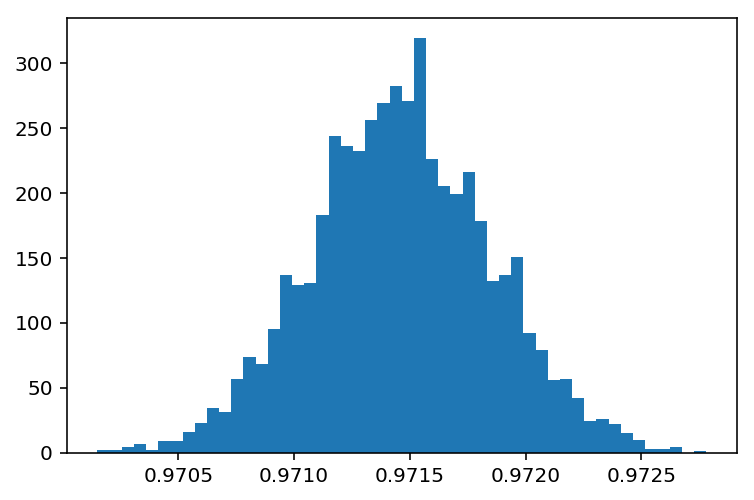

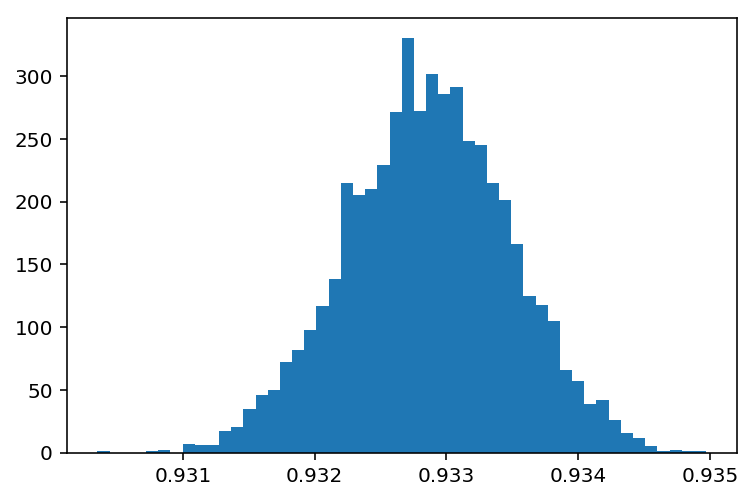

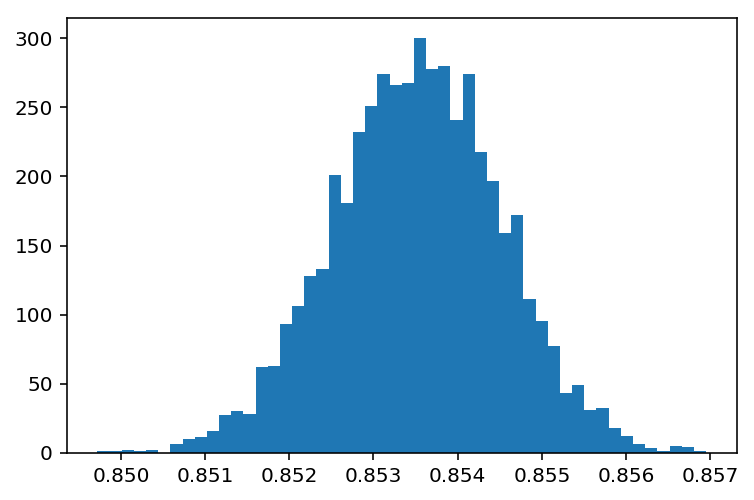

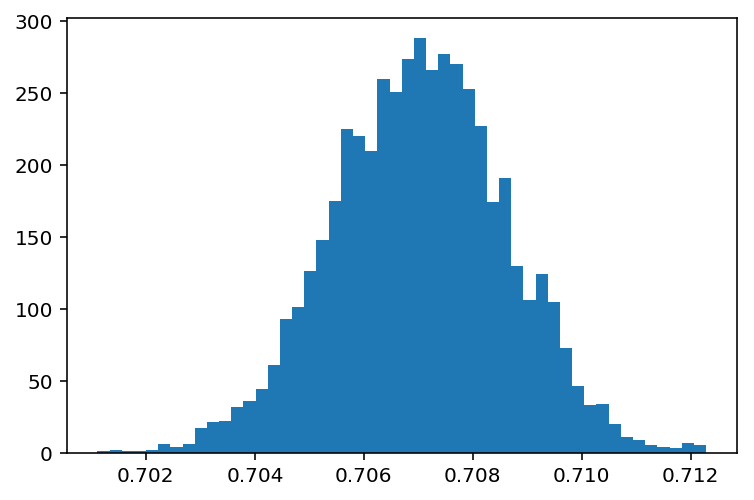

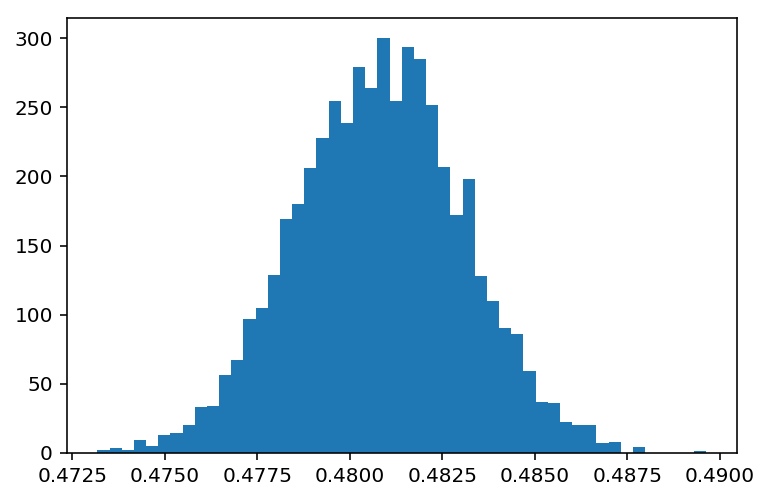

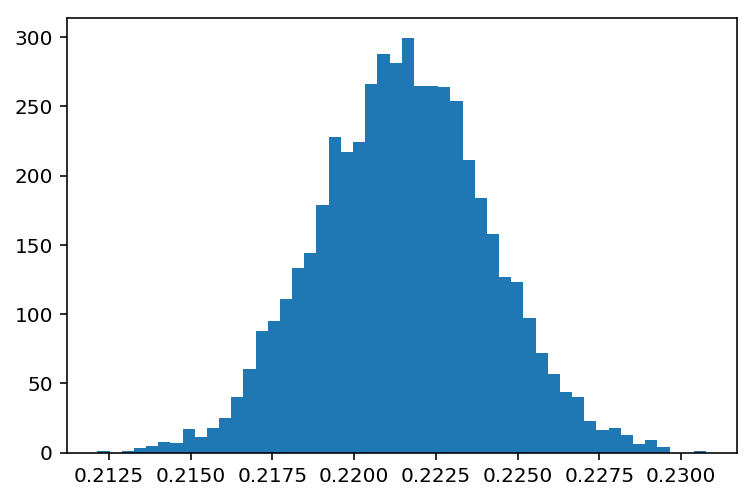

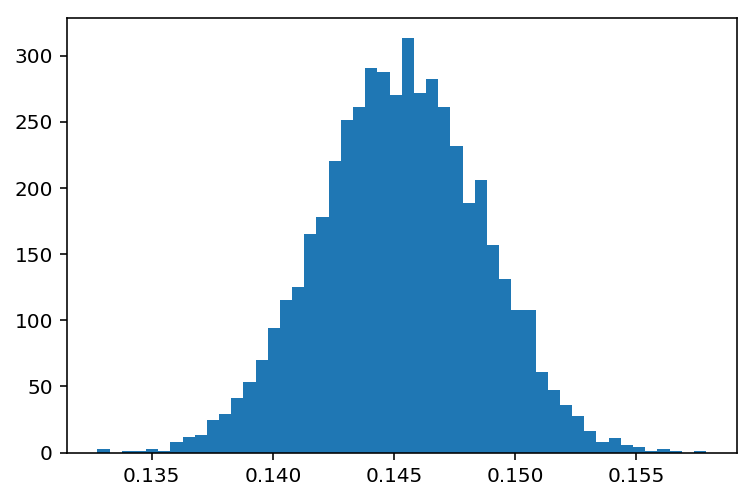

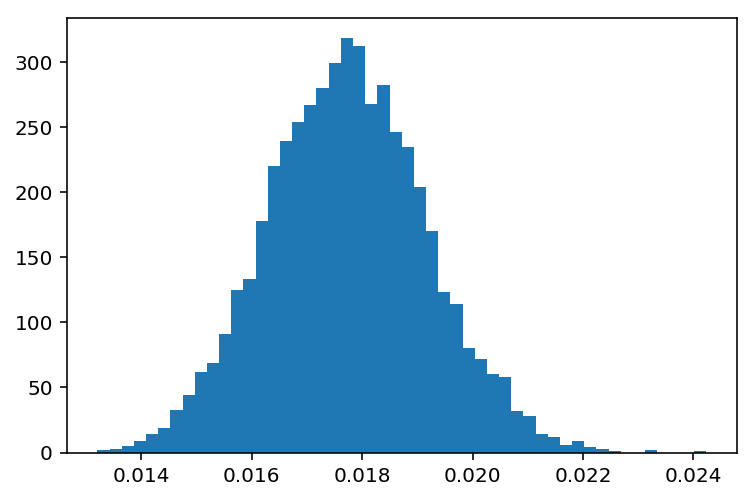

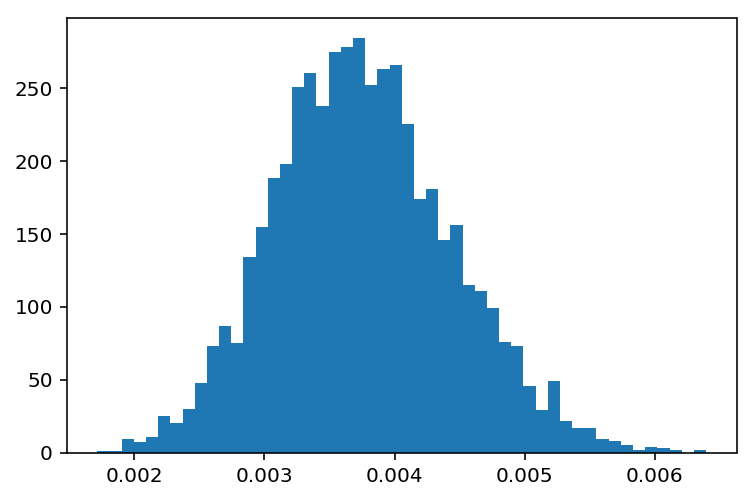

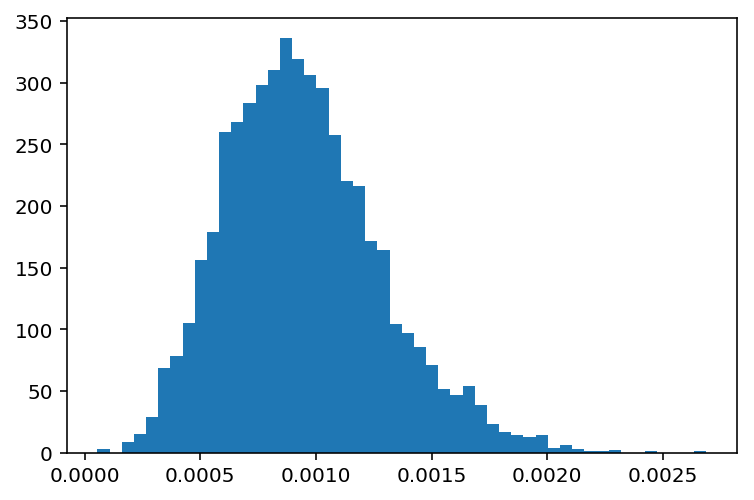

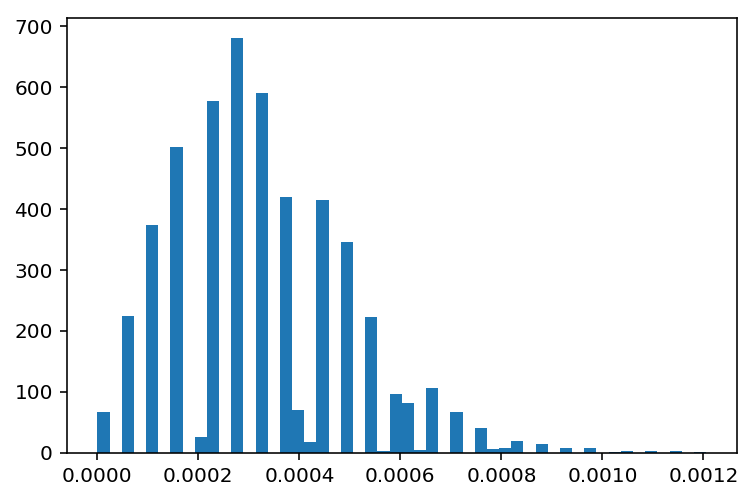

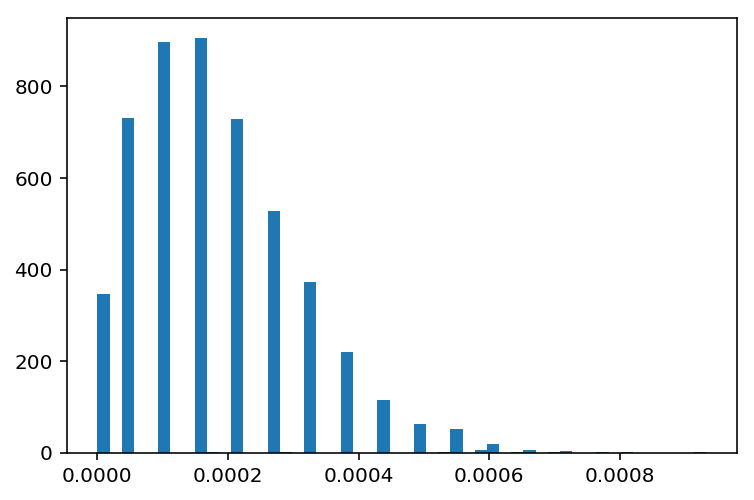

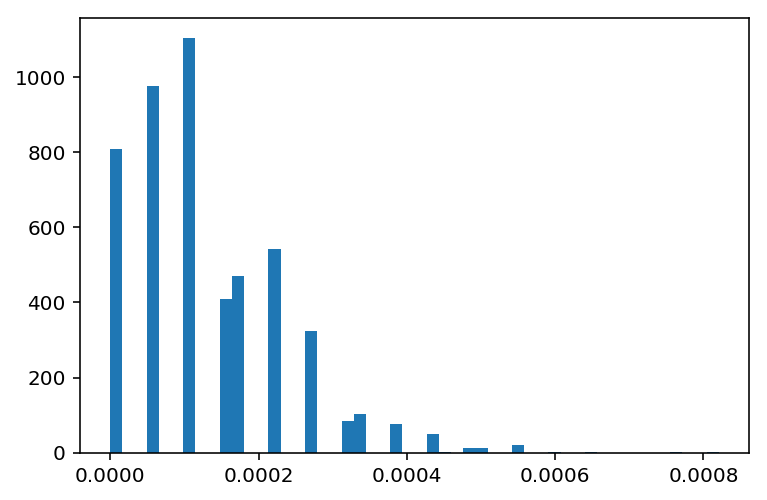

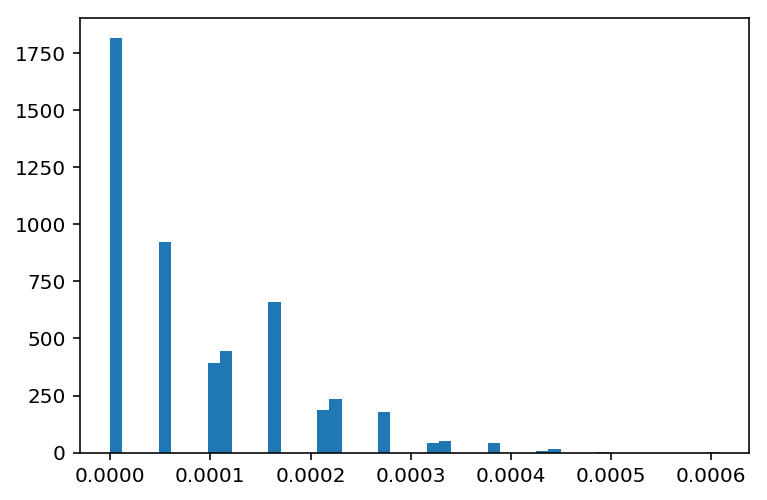

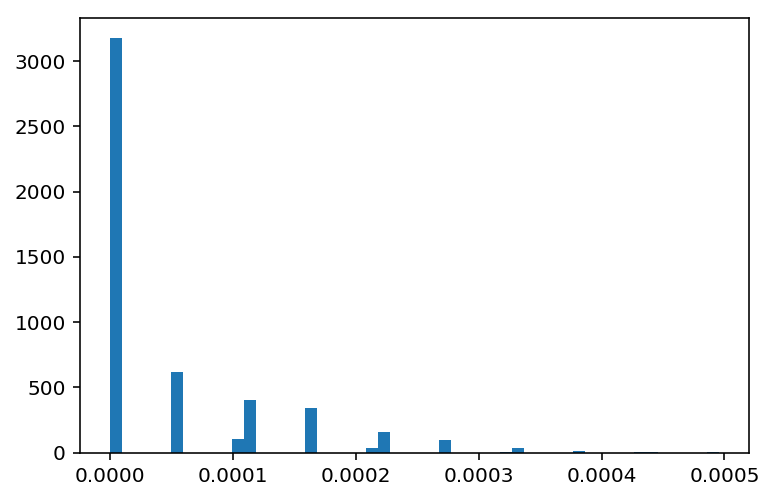

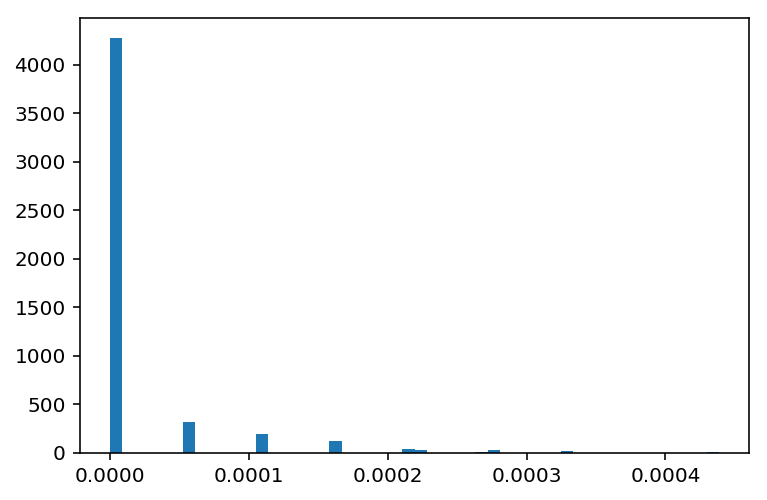

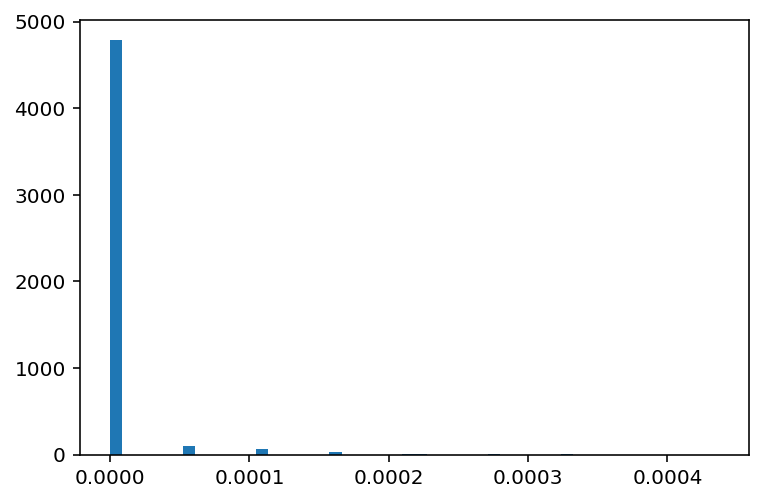

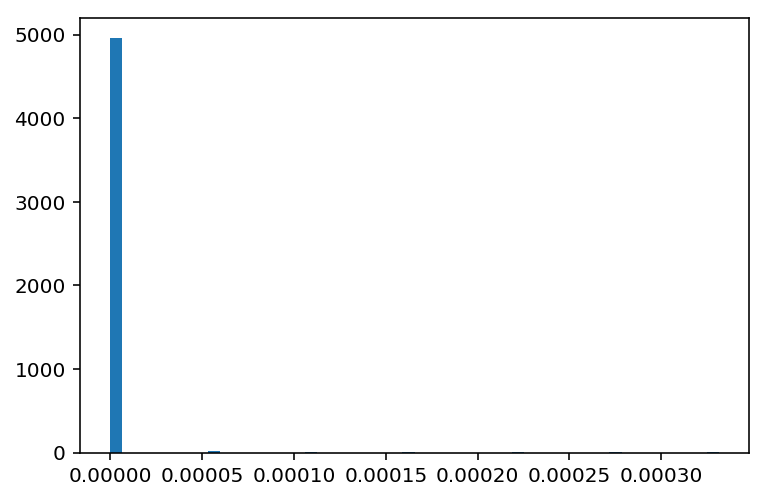

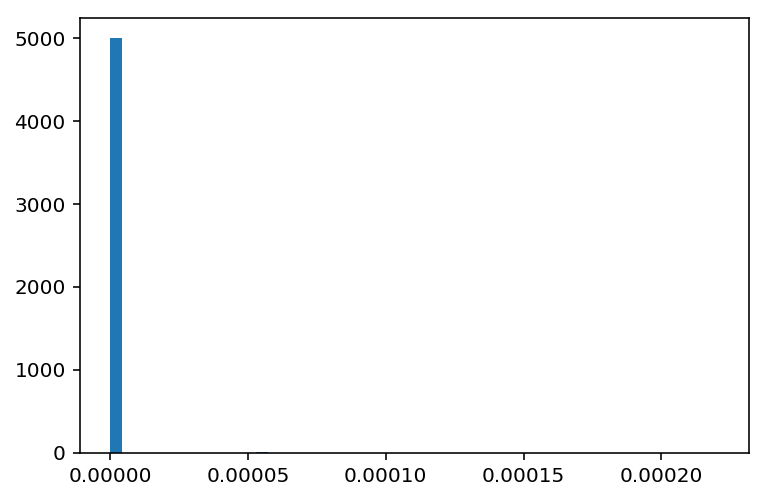

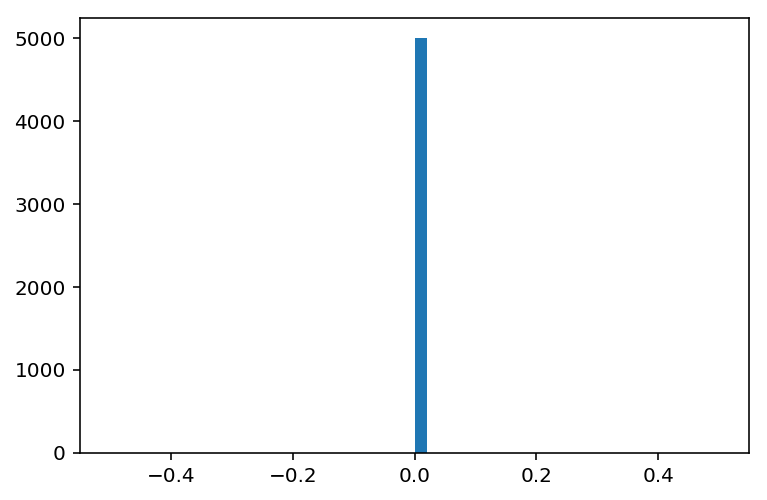

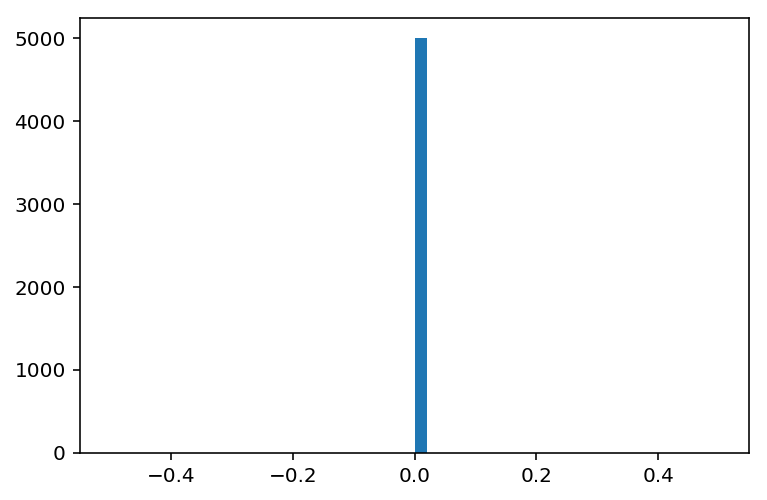

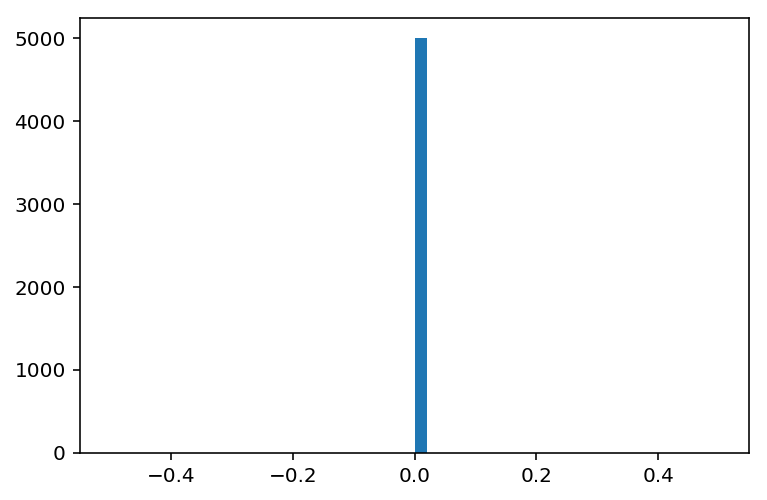

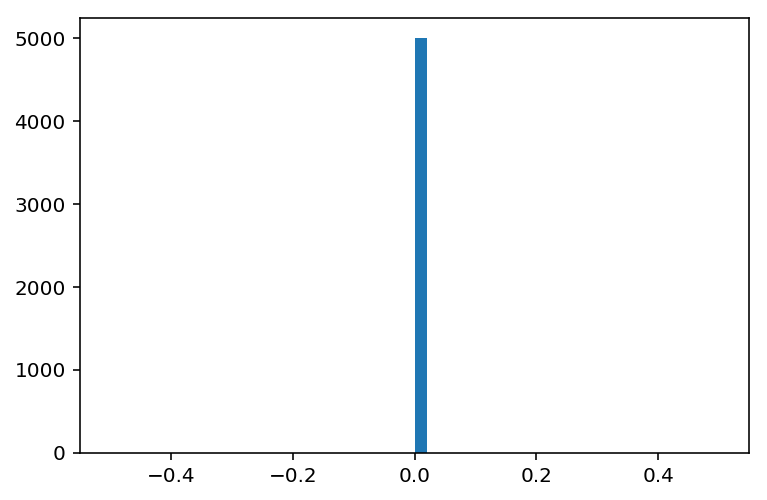

In [47]:
for i in range(40):
    plt.figure()
    plt.hist(pert['func_all'][5000:10000,i*4],50)

In [75]:
from scipy.optimize import curve_fit

In [84]:
def f(x,alpha,gamma):
    return gamma*(1.-np.exp(-alpha*x+alpha*N_pert+np.log(1.-1./gamma)))

In [85]:
x = np.arange(1,101)*100

In [23]:
print Npert_test[-1]

[ 0.05906555  0.01968789  0.03268633  0.41741111  0.02148075  0.17551568
  0.16758776]


[  2.58409347e-04   1.05256994e+00] 0.0621706186166
[  8.90483514e-06   3.73318291e+00] 0.0734985034303
[  4.70903179e-04   1.00622643e+00] 0.0328898527202
[  2.03920636e-04   1.12568926e+00] 0.469875201567
[  5.15885090e-04   1.00383081e+00] 0.0215630338805
[  2.54929058e-04   1.06832075e+00] 0.187507046007
[  2.74207253e-04   1.05465217e+00] 0.176746796208


/home/kuw8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


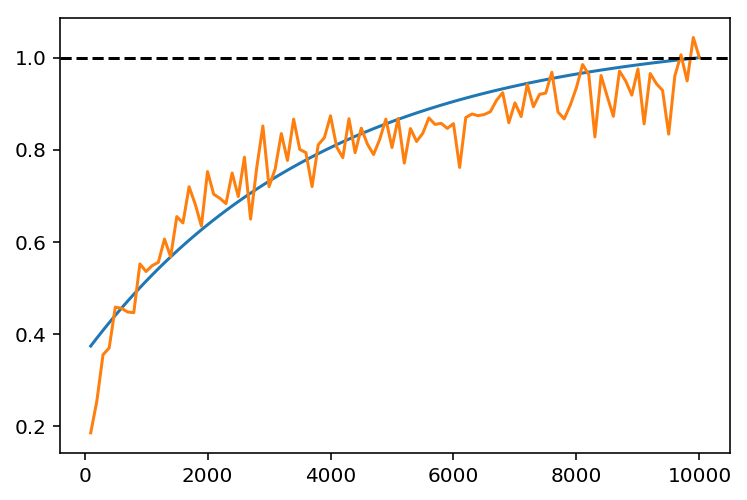

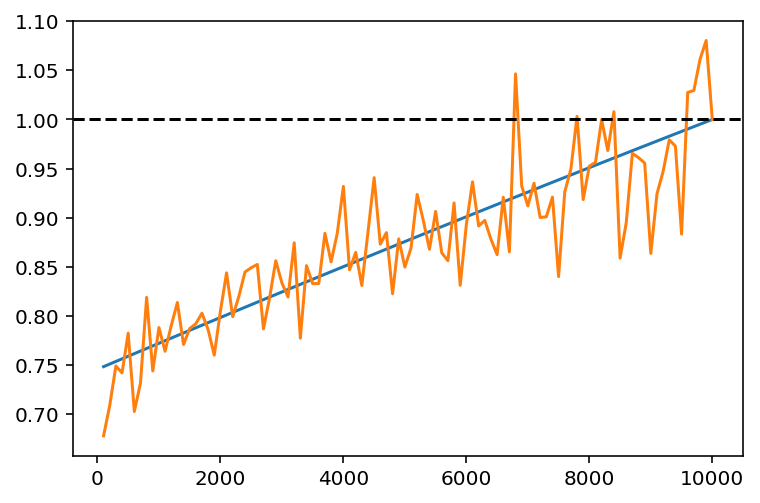

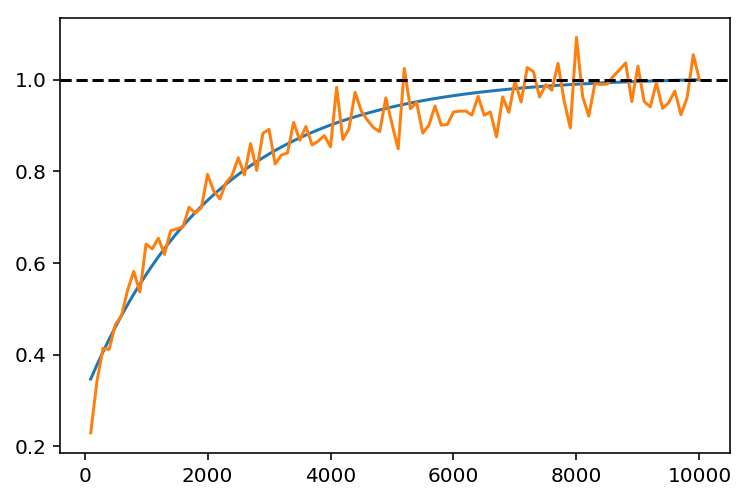

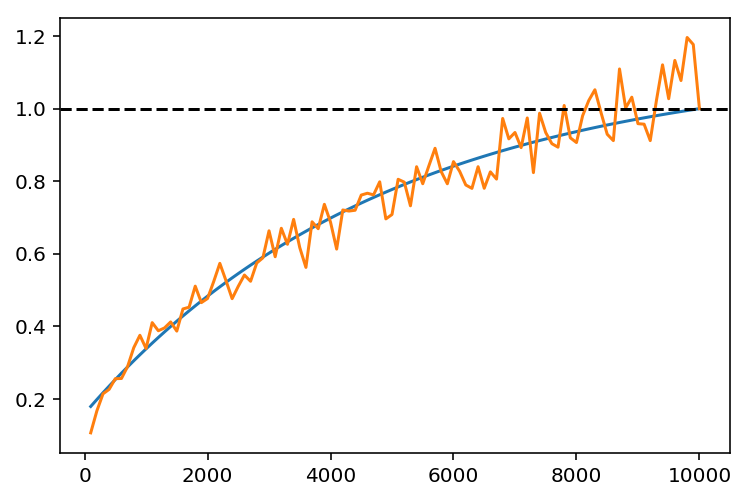

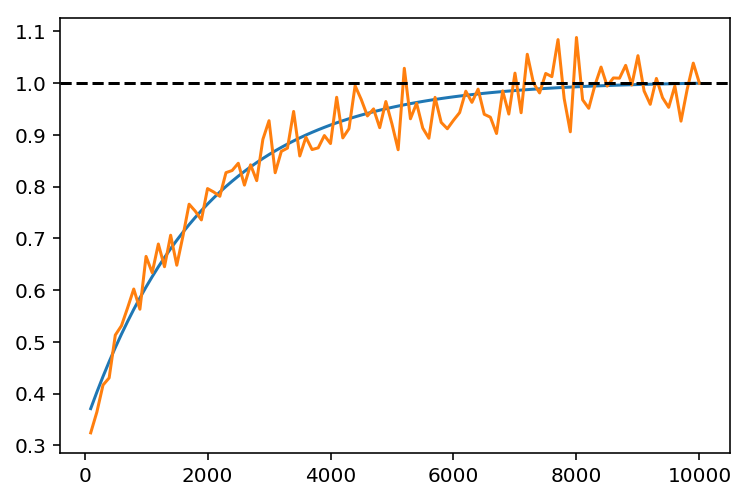

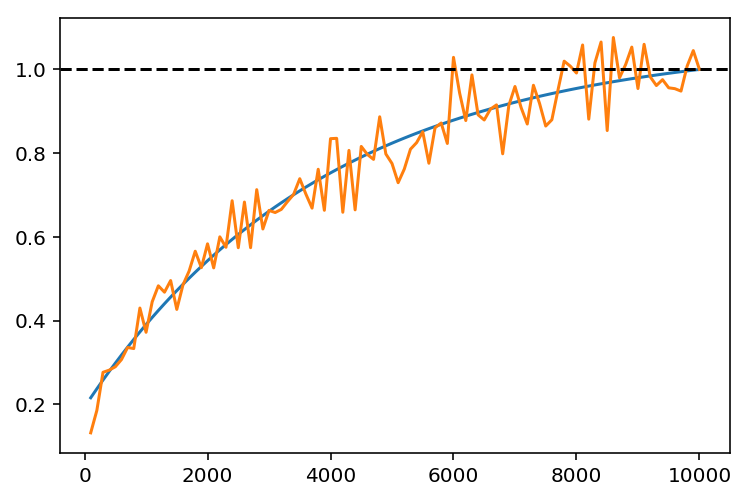

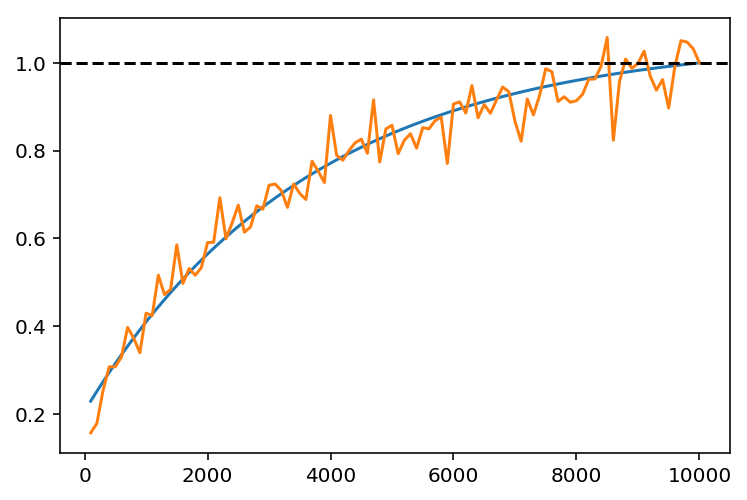

In [88]:
for i in range(7):
    plt.figure()
    fit = curve_fit(f,x,Npert_test[:,i]/Npert_test[-1,i],p0=(1e-4,3))
    plt.plot(x,f(x,fit[0][0],fit[0][1]))
    plt.plot(np.linspace(100,10000,100),Npert_test[:,i]/Npert_test[-1,i])
    plt.axhline(1,color='k',linestyle='--')
    print fit[0],Npert_test[-1,i]*fit[0][1]

In [89]:
obs_idx = [0,9,15,23,38,44,52,63,70,80,90,91,92]

In [90]:
dfdp_test = []
for j in range(N_pert/100):
        print j
        dfdp_test.append(df_dp(pert['func_all'][idx_pert[j]][:,obs_idx],p_pert[idx_pert[j]]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [91]:
dfdp_test = np.array(dfdp_test)

In [92]:
param_list = [r'$\alpha$', r'$logM_1$', r'$\sigma_{logM}$', r'$logM_0$', r'$logM_{min}$', r'$A_{cen}$', r'$A_{sat}$']

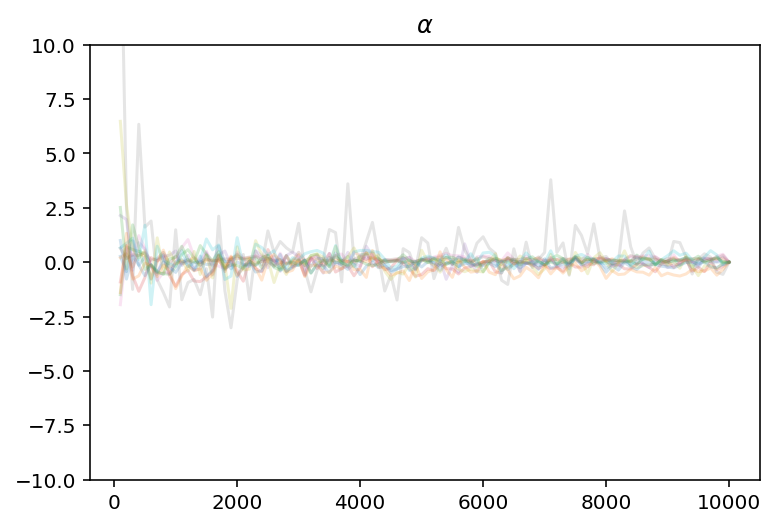

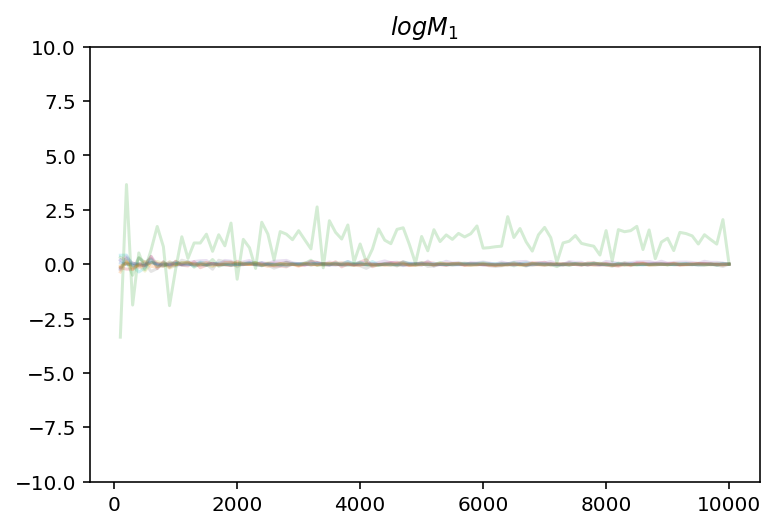

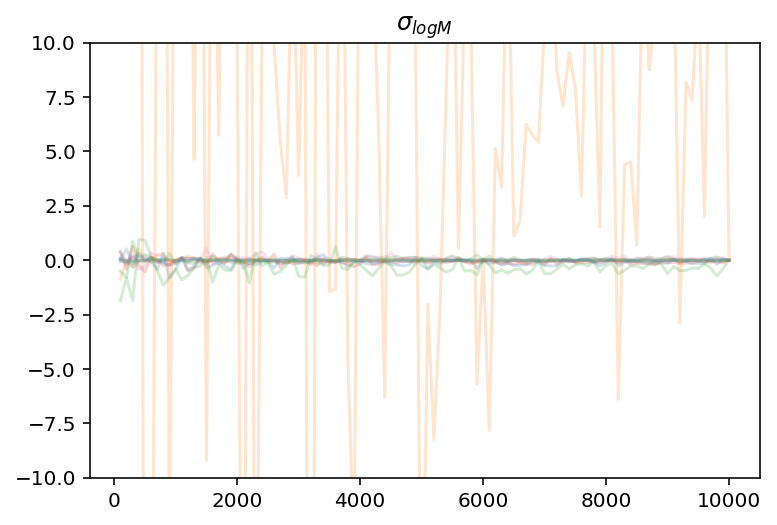

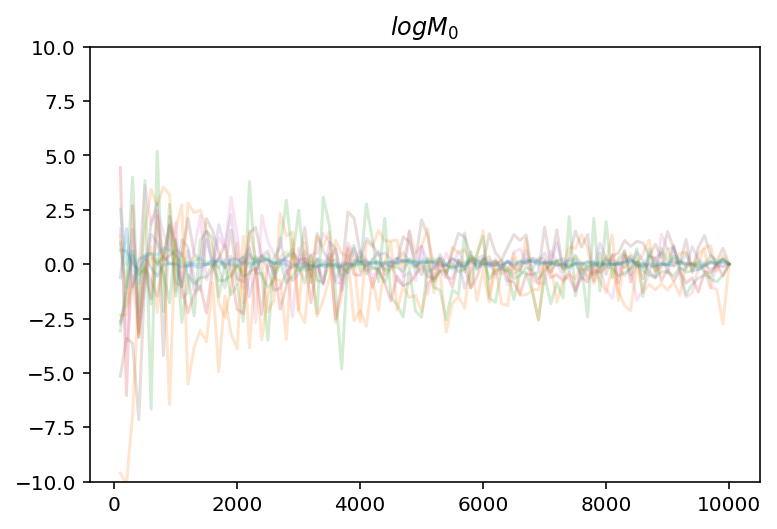

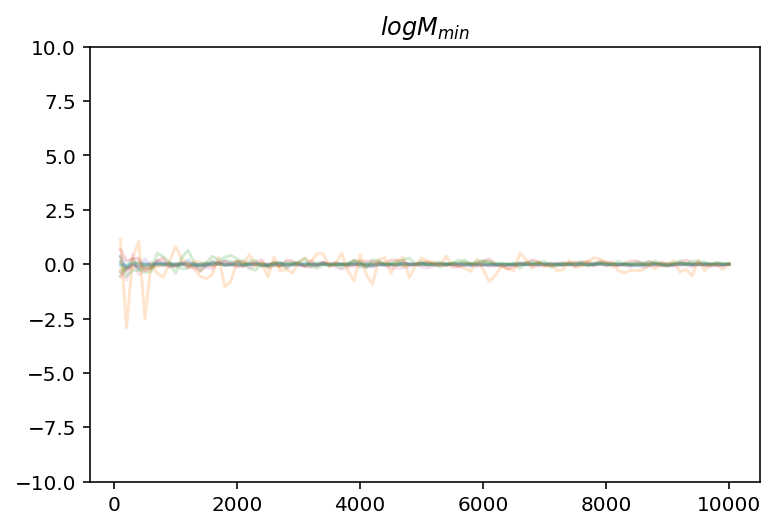

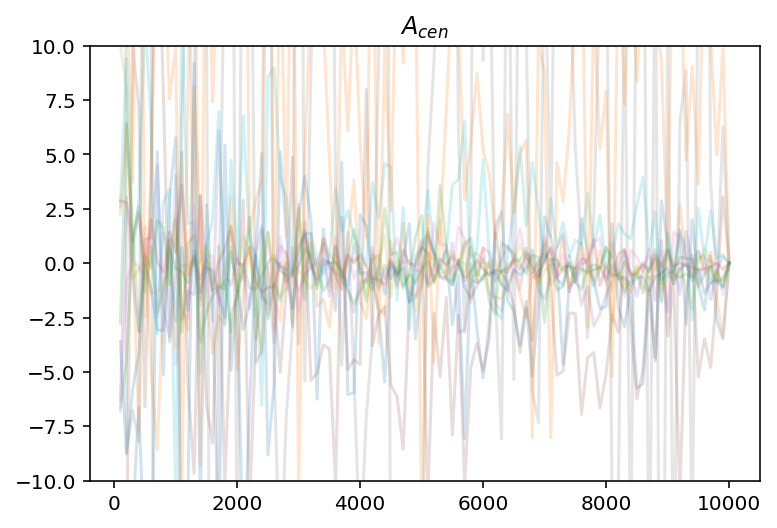

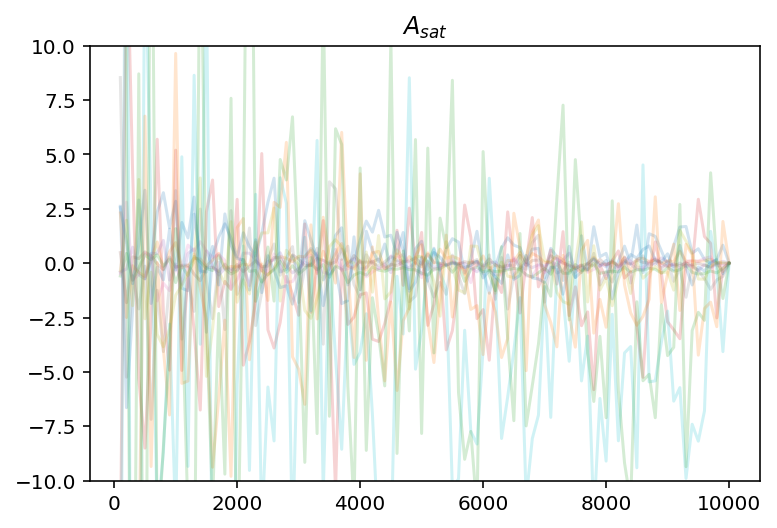

In [93]:
for i in range(7):
    plt.figure()
    plt.title(param_list[i])
    for j in range(13):
        plt.plot(np.arange(1,101)*100,dfdp_test[:,i,j]/dfdp_test[-1,i,j]-1,alpha=0.2)
        plt.ylim((-10,10))

In [94]:
dfdp_test[-1]

array([[ -7.68358400e-05,   1.95256459e+02,   2.73352283e+01,
          4.31432324e+00,   2.12399740e+00,   1.79589456e+00,
          2.42892262e-01,   4.19600000e-04,   2.23600000e-03,
          9.87760000e-03,   4.59618851e-02,  -2.63918648e-02,
         -3.22235817e-02],
       [ -5.18987520e-04,  -5.08315125e+02,  -5.04320604e+01,
         -8.54169330e+00,  -4.49838514e+00,  -4.77360531e+00,
         -5.62001497e-01,   3.32840000e-03,   1.14564000e-02,
          3.68740000e-02,   2.38796992e-01,   1.07635774e-01,
          4.67313906e-03],
       [  1.33000960e-03,  -3.13709655e+02,  -6.03140616e+01,
         -1.49933415e+01,  -1.72639192e+01,  -5.00168208e+00,
         -5.30961180e-01,  -1.06810000e-02,  -4.73115000e-02,
         -2.63419000e-01,  -6.53172467e-02,   7.16870485e-04,
          3.05268833e-02],
       [ -3.36358400e-05,   4.33804734e+00,   7.87030523e-01,
          4.26914174e-01,   1.82832808e-01,   4.72869034e-02,
          1.29031842e-02,   2.45700000e-04,   8.753

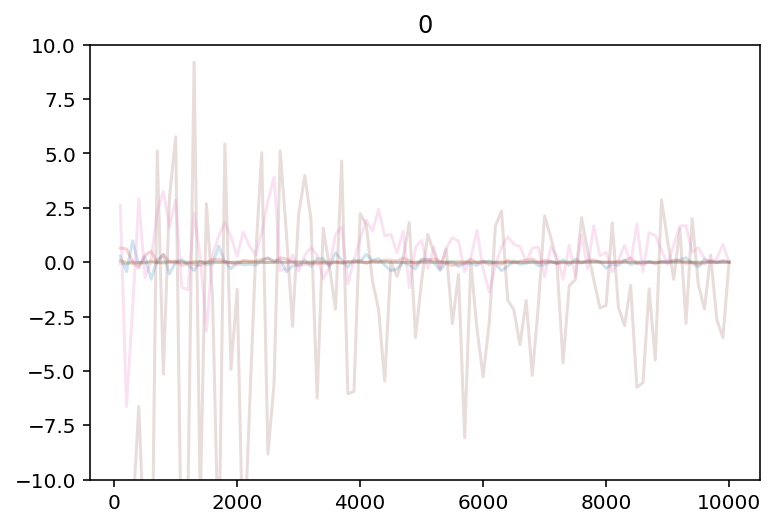

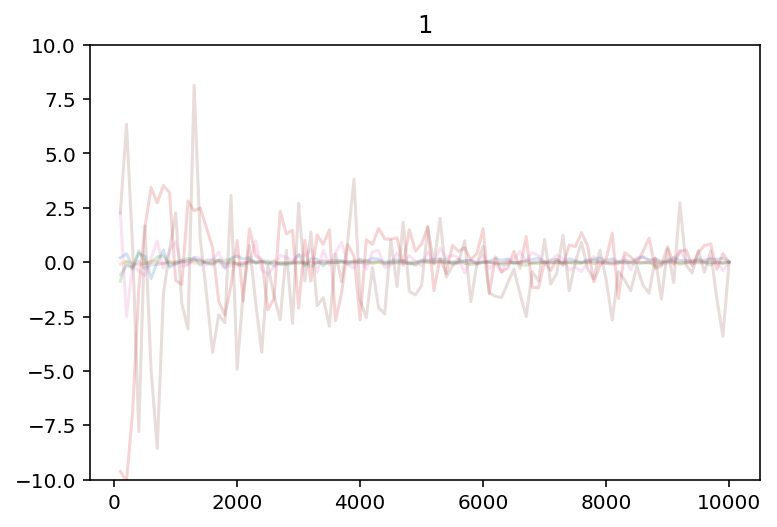

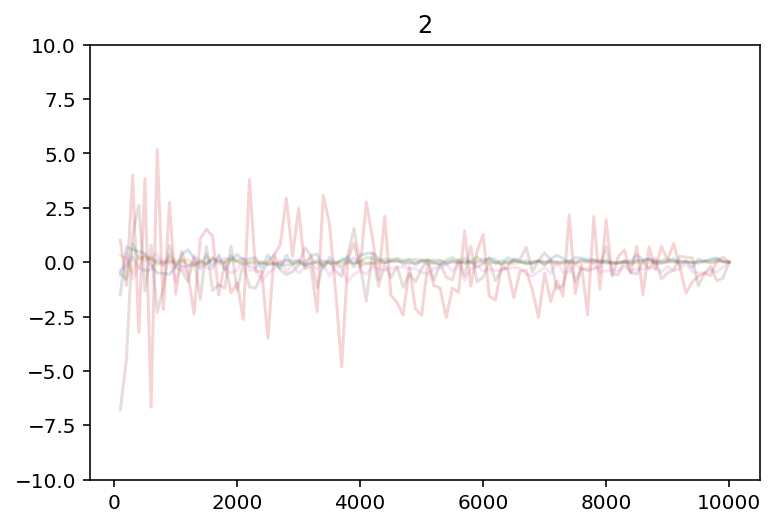

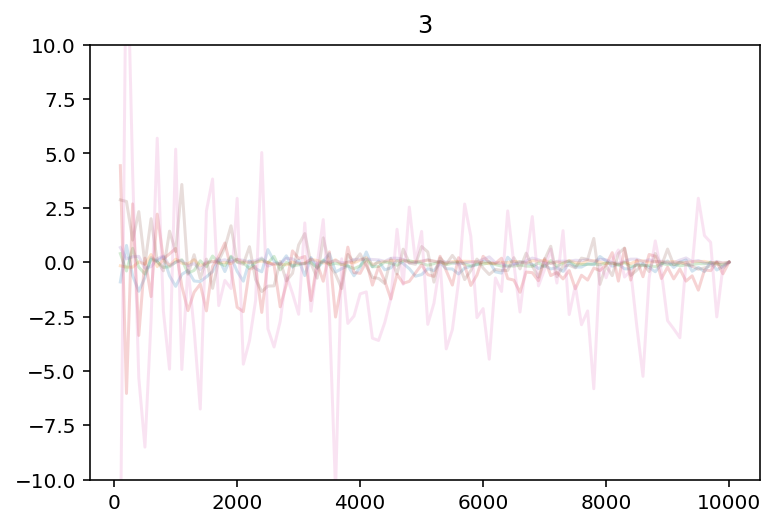

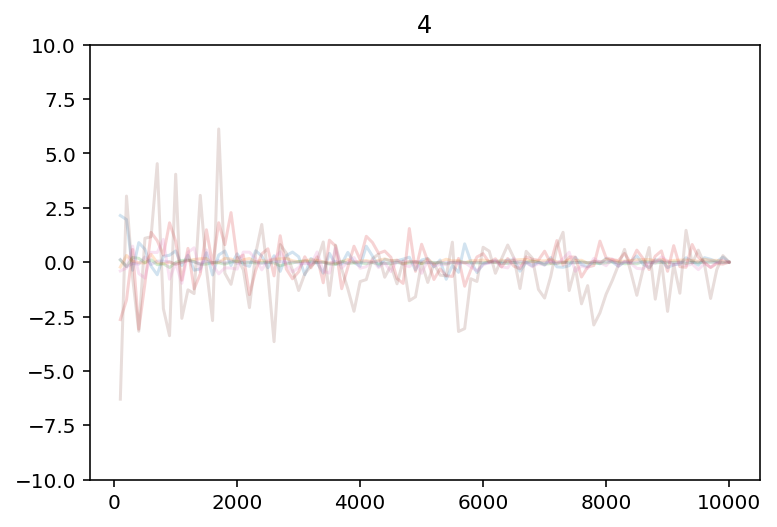

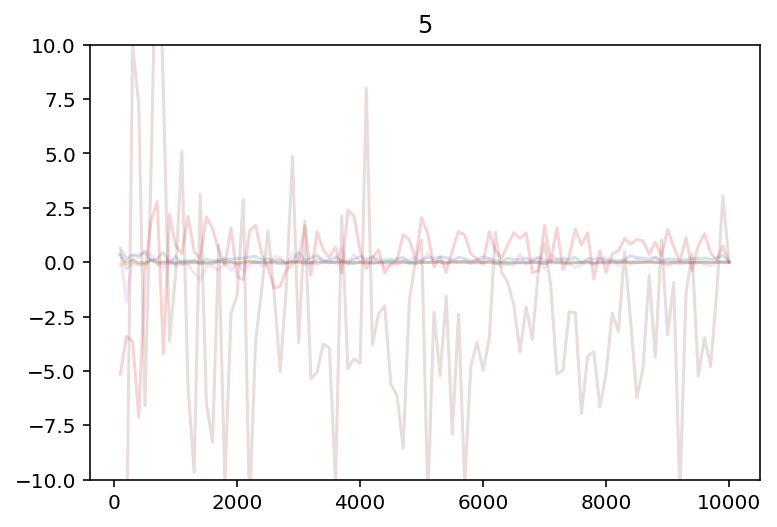

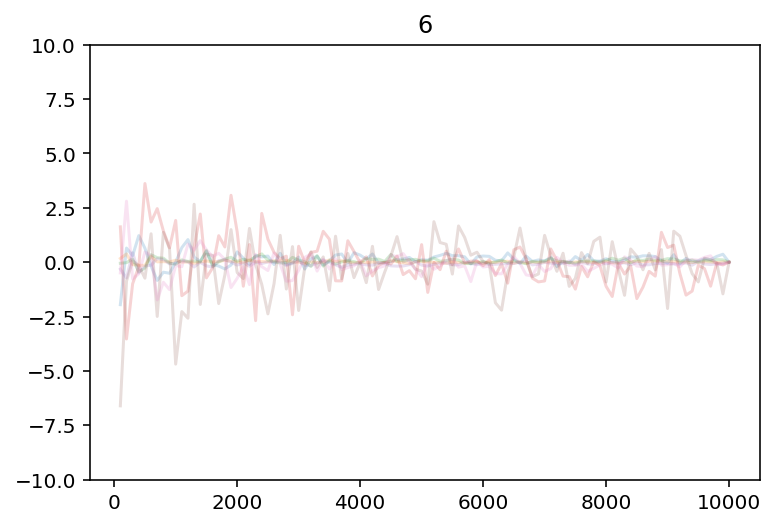

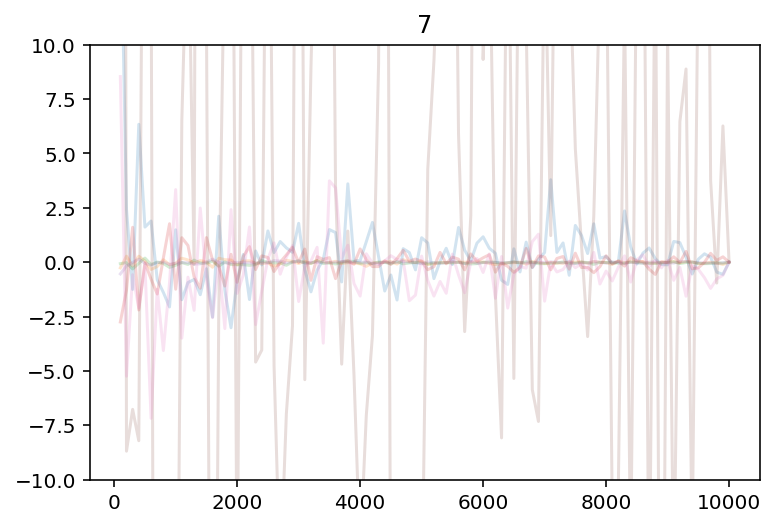

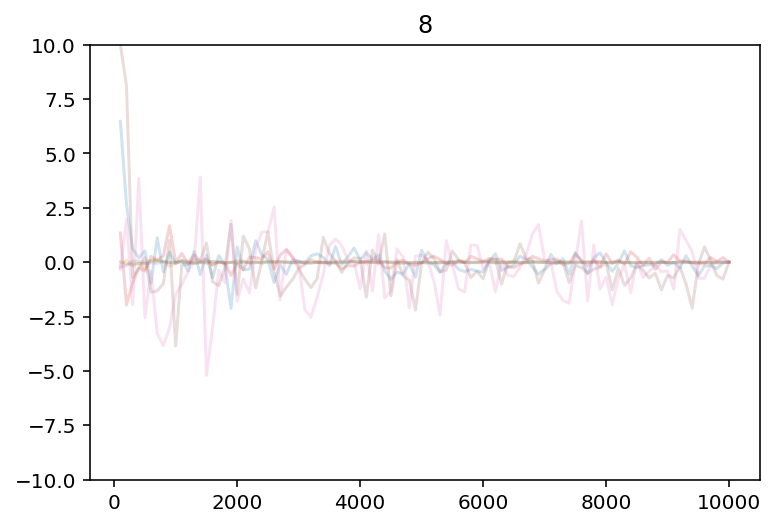

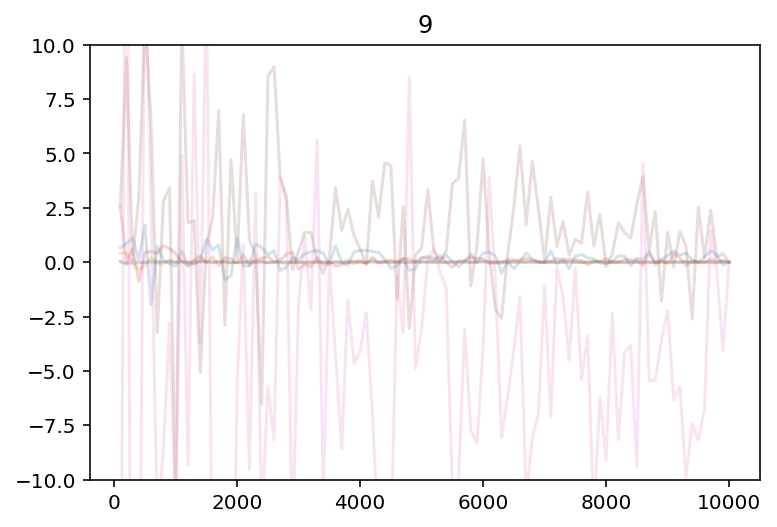

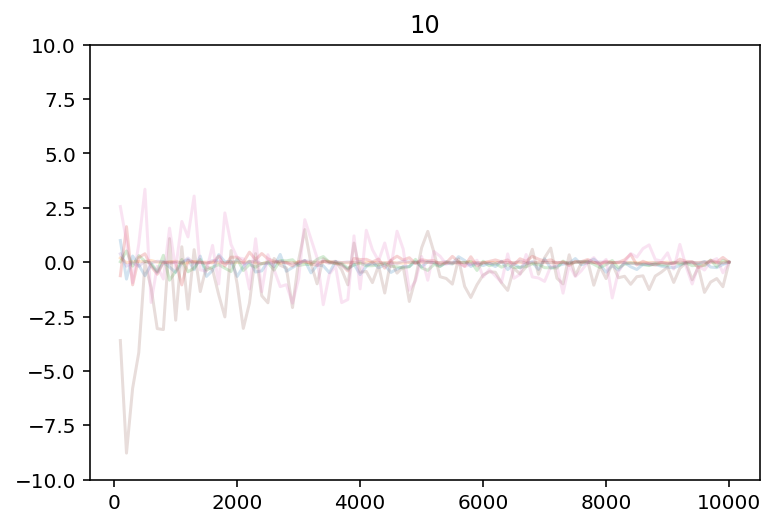

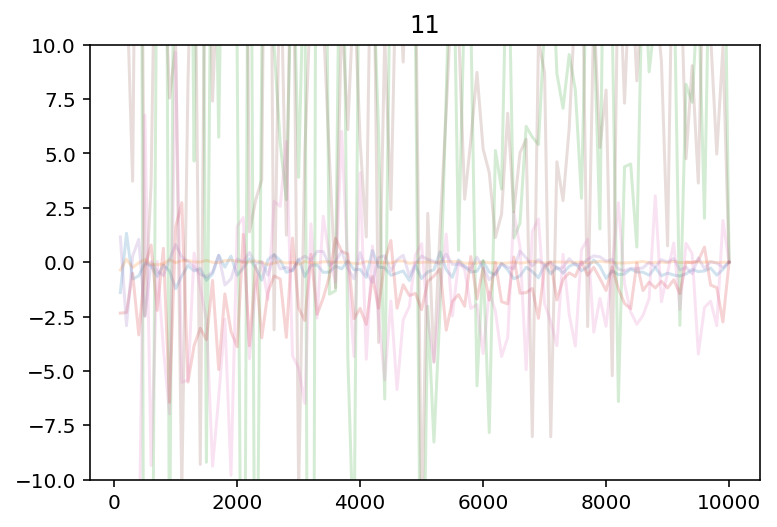

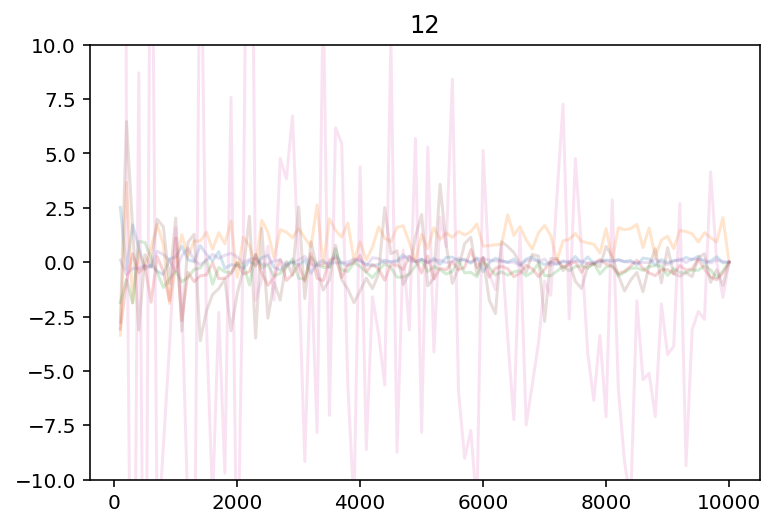

In [95]:
for i in range(13):
    plt.figure()
    plt.title(i)
    for j in range(7):
        plt.plot(np.arange(1,101)*100,dfdp_test[:,j,i]/dfdp_test[-1,j,i]-1,alpha=0.2)
        plt.ylim((-10,10))

In [96]:
dfdp_test[-1].T

array([[ -7.68358400e-05,  -5.18987520e-04,   1.33000960e-03,
         -3.36358400e-05,  -2.25027520e-03,   1.43488000e-06,
          5.70112000e-06],
       [  1.95256459e+02,  -5.08315125e+02,  -3.13709655e+02,
          4.33804734e+00,   4.92988690e+02,   6.63691313e+00,
          2.92995818e+01],
       [  2.73352283e+01,  -5.04320604e+01,  -6.03140616e+01,
          7.87030523e-01,   7.06919196e+01,   4.25734388e+00,
          1.05072509e+01],
       [  4.31432324e+00,  -8.54169330e+00,  -1.49933415e+01,
          4.26914174e-01,   1.57087294e+01,   1.04398017e+00,
         -3.00453912e-01],
       [  2.12399740e+00,  -4.49838514e+00,  -1.72639192e+01,
          1.82832808e-01,   2.00748272e+01,  -1.81033292e-01,
          9.63683023e-01],
       [  1.79589456e+00,  -4.77360531e+00,  -5.00168208e+00,
          4.72869034e-02,   7.21239629e+00,  -2.40843266e-02,
          3.81608127e-01],
       [  2.42892262e-01,  -5.62001497e-01,  -5.30961180e-01,
          1.29031842e-02,   7.97